<font size="4"> <b> • DOMAIN: </b>Automobile</font>

<font size="4"> <b> • CONTEXT: </b>The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

<font size="4"> <b> • DATA DESCRIPTION: </b>The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
    
• All the features are numeric i.e. geometric features extracted from the silhouette.

<font size="4"> <b> • PROJECT OBJECTIVE: </b>Apply dimensionality reduction technique – PCA and train a model using principal components instead of training the model using just the raw data.

<b>Steps and tasks: [ Total Score: 20 points]</b>
    
1. Data:
    
>Import, clean and pre-process the data
    
2. EDA and visualisation:
    
>Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden patterns by using all possible methods. 
    
><b>For example:</b> Use your best analytical approach to build this report. Even you can mix match columns to create new columns which can be used for better analysis. Create your own features if required. Be highly experimental and analytical here to find hidden patterns.
    
3. Classifier:
    
>Design and train a best fit SVM classier using all the data attributes.
   
4. Dimensional reduction:
    
> Perform dimensional reduction on the data.
    
5. Classifier:
    
> Design and train a best fit SVM classier using dimensionally reduced attributes.
    
6. Conclusion:
    
> Showcase key pointer on how dimensional reduction helped in this case.
</font>
 

<font size="5"><p style="color:black"> <b> 1. Data:</p></font>

 <span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">1.1 Import, clean and pre-process the data

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.1.1 Import all the given datasets and explore shape and size.

In [234]:
auto_sillhouette = pd.read_csv('Part3 - vehicle.csv')
auto_sillhouette.head() 

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [235]:
auto_sillhouette.shape

(846, 19)

In [236]:
auto_sillhouette.size

16074

In [237]:
auto_sillhouette.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.1.2 Data cleansing:

#### a) Checking for Duplicates

In [238]:
# Identify duplicates records in the data
dupe3 = auto_sillhouette.duplicated()
sum(dupe3)

0

#### b) Checking for Duplicate Index

In [239]:
auto_sillhouette.index.is_unique

True

#### c) Checking for Null/missing values

In [240]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(auto_sillhouette)

,Total,Percent
radius_ratio,6,0.007092
skewness_about,6,0.007092
circularity,5,0.005910
distance_circularity,4,0.004728
scaled_radius_of_gyration.1,4,0.004728
pr.axis_rectangularity,3,0.003546
scaled_variance,3,0.003546
pr.axis_aspect_ratio,2,0.002364
scaled_variance.1,2,0.002364
scaled_radius_of_gyration,2,0.002364


In [241]:
missing_check(auto_sillhouette).sum()

Total      41.000000
Percent     0.048463
dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.1.3 Imputing Null/Missing Values by correlation prediction

In [242]:
auto_sillhouette.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [243]:
auto_sillhouette.mean()

compactness                     93.678487
circularity                     44.828775
distance_circularity            82.110451
radius_ratio                   168.888095
pr.axis_aspect_ratio            61.678910
max.length_aspect_ratio          8.567376
scatter_ratio                  168.901775
elongatedness                   40.933728
pr.axis_rectangularity          20.582444
max.length_rectangularity      147.998818
scaled_variance                188.631079
scaled_variance.1              439.494076
scaled_radius_of_gyration      174.709716
scaled_radius_of_gyration.1     72.447743
skewness_about                   6.364286
skewness_about.1                12.602367
skewness_about.2               188.919527
hollows_ratio                  195.632388
dtype: float64

In [244]:
drop_sillhouette_na = auto_sillhouette.dropna()

In [245]:
drop_sillhouette_na = drop_sillhouette_na.corr().abs().unstack().sort_values(kind='quicksort', ascending=False).reset_index()
drop_sillhouette_na.rename(columns={"level_0": "Feature A", "level_1": "Feature B", 0: 'Correlation Coefficient'}, inplace=True)
drop_sillhouette_na[drop_sillhouette_na['Feature A'] == 'radius_ratio'].style.background_gradient(cmap='summer_r')

,Feature A,Feature B,Correlation Coefficient
2,radius_ratio,radius_ratio,1.000000
74,radius_ratio,scaled_variance,0.806788
84,radius_ratio,elongatedness,0.795761
100,radius_ratio,distance_circularity,0.771404
113,radius_ratio,scatter_ratio,0.743470
115,radius_ratio,scaled_variance.1,0.731773
117,radius_ratio,pr.axis_rectangularity,0.716210
123,radius_ratio,compactness,0.688130
126,radius_ratio,pr.axis_aspect_ratio,0.667375
131,radius_ratio,circularity,0.623950


In [246]:
drop_sillhouette_na[drop_sillhouette_na['Feature A'] == 'skewness_about'].style.background_gradient(cmap='summer_r')

,Feature A,Feature B,Correlation Coefficient
13,skewness_about,skewness_about,1.000000
172,skewness_about,compactness,0.231648
212,skewness_about,scaled_radius_of_gyration,0.162397
222,skewness_about,circularity,0.141726
233,skewness_about,max.length_rectangularity,0.130356
249,skewness_about,skewness_about.2,0.111135
250,skewness_about,distance_circularity,0.110280
263,skewness_about,hollows_ratio,0.098128
267,skewness_about,scaled_radius_of_gyration.1,0.088109
273,skewness_about,pr.axis_rectangularity,0.078701


In [247]:
drop_sillhouette_na[drop_sillhouette_na['Feature A'] == 'circularity'].style.background_gradient(cmap='summer_r')

,Feature A,Feature B,Correlation Coefficient
9,circularity,circularity,1.000000
27,circularity,max.length_rectangularity,0.965366
41,circularity,scaled_radius_of_gyration,0.935594
56,circularity,scatter_ratio,0.858149
59,circularity,pr.axis_rectangularity,0.856137
60,circularity,scaled_variance.1,0.850932
63,circularity,elongatedness,0.825108
76,circularity,scaled_variance,0.806108
81,circularity,distance_circularity,0.797704
121,circularity,compactness,0.689885


In [248]:
drop_sillhouette_na[drop_sillhouette_na['Feature A'] == 'distance_circularity'].style.background_gradient(cmap='summer_r')

,Feature A,Feature B,Correlation Coefficient
16,distance_circularity,distance_circularity,1.000000
43,distance_circularity,elongatedness,0.912713
45,distance_circularity,scatter_ratio,0.909023
47,distance_circularity,pr.axis_rectangularity,0.897261
51,distance_circularity,scaled_variance.1,0.891789
52,distance_circularity,scaled_variance,0.865683
80,distance_circularity,circularity,0.797704
92,distance_circularity,compactness,0.789955
99,distance_circularity,max.length_rectangularity,0.773459
101,distance_circularity,radius_ratio,0.771404


In [249]:
drop_sillhouette_na[drop_sillhouette_na['Feature A'] == 'scaled_radius_of_gyration.1'].style.background_gradient(cmap='summer_r')

,Feature A,Feature B,Correlation Coefficient
12,scaled_radius_of_gyration.1,scaled_radius_of_gyration.1,1.000000
79,scaled_radius_of_gyration.1,hollows_ratio,0.798810
108,scaled_radius_of_gyration.1,skewness_about.2,0.748668
153,scaled_radius_of_gyration.1,max.length_aspect_ratio,0.308329
162,scaled_radius_of_gyration.1,compactness,0.258437
169,scaled_radius_of_gyration.1,distance_circularity,0.238145
199,scaled_radius_of_gyration.1,scaled_radius_of_gyration,0.177284
201,scaled_radius_of_gyration.1,radius_ratio,0.175348
202,scaled_radius_of_gyration.1,pr.axis_aspect_ratio,0.173060
237,scaled_radius_of_gyration.1,skewness_about.1,0.120600


In [250]:
drop_sillhouette_na[drop_sillhouette_na['Feature A'] == 'pr.axis_rectangularity'].style.background_gradient(cmap='summer_r')

,Feature A,Feature B,Correlation Coefficient
7,pr.axis_rectangularity,pr.axis_rectangularity,1.000000
20,pr.axis_rectangularity,scaled_variance.1,0.992119
22,pr.axis_rectangularity,scatter_ratio,0.991992
30,pr.axis_rectangularity,elongatedness,0.950345
38,pr.axis_rectangularity,scaled_variance,0.935653
46,pr.axis_rectangularity,distance_circularity,0.897261
58,pr.axis_rectangularity,circularity,0.856137
66,pr.axis_rectangularity,compactness,0.814227
70,pr.axis_rectangularity,max.length_rectangularity,0.811979
89,pr.axis_rectangularity,scaled_radius_of_gyration,0.792895


In [251]:
drop_sillhouette_na[drop_sillhouette_na['Feature A'] == 'scaled_variance'].style.background_gradient(cmap='summer_r')

,Feature A,Feature B,Correlation Coefficient
8,scaled_variance,scaled_variance,1.000000
33,scaled_variance,scatter_ratio,0.950067
34,scaled_variance,scaled_variance.1,0.947617
36,scaled_variance,elongatedness,0.937846
39,scaled_variance,pr.axis_rectangularity,0.935653
53,scaled_variance,distance_circularity,0.865683
75,scaled_variance,radius_ratio,0.806788
77,scaled_variance,circularity,0.806108
96,scaled_variance,scaled_radius_of_gyration,0.776051
104,scaled_variance,compactness,0.764386


In [252]:
drop_sillhouette_na[drop_sillhouette_na['Feature A'] == 'pr.axis_aspect_ratio'].style.background_gradient(cmap='summer_r')

,Feature A,Feature B,Correlation Coefficient
3,pr.axis_aspect_ratio,pr.axis_aspect_ratio,1.000000
127,pr.axis_aspect_ratio,radius_ratio,0.667375
129,pr.axis_aspect_ratio,max.length_aspect_ratio,0.652093
157,pr.axis_aspect_ratio,scaled_variance,0.290375
164,pr.axis_aspect_ratio,hollows_ratio,0.257566
177,pr.axis_aspect_ratio,skewness_about.2,0.229702
192,pr.axis_aspect_ratio,elongatedness,0.191193
203,pr.axis_aspect_ratio,scaled_radius_of_gyration.1,0.173060
211,pr.axis_aspect_ratio,distance_circularity,0.163386
214,pr.axis_aspect_ratio,circularity,0.155023


In [253]:
drop_sillhouette_na[drop_sillhouette_na['Feature A'] == 'scaled_variance.1'].style.background_gradient(cmap='summer_r')

,Feature A,Feature B,Correlation Coefficient
10,scaled_variance.1,scaled_variance.1,1.000000
18,scaled_variance.1,scatter_ratio,0.996396
21,scaled_variance.1,pr.axis_rectangularity,0.992119
29,scaled_variance.1,elongatedness,0.956858
35,scaled_variance.1,scaled_variance,0.947617
50,scaled_variance.1,distance_circularity,0.891789
61,scaled_variance.1,circularity,0.850932
64,scaled_variance.1,compactness,0.820240
83,scaled_variance.1,max.length_rectangularity,0.796230
90,scaled_variance.1,scaled_radius_of_gyration,0.791997


In [254]:
drop_sillhouette_na[drop_sillhouette_na['Feature A'] == 'scaled_radius_of_gyration'].style.background_gradient(cmap='summer_r')

,Feature A,Feature B,Correlation Coefficient
11,scaled_radius_of_gyration,scaled_radius_of_gyration,1.000000
40,scaled_radius_of_gyration,circularity,0.935594
55,scaled_radius_of_gyration,max.length_rectangularity,0.865240
86,scaled_radius_of_gyration,scatter_ratio,0.795748
88,scaled_radius_of_gyration,pr.axis_rectangularity,0.792895
91,scaled_radius_of_gyration,scaled_variance.1,0.791997
97,scaled_radius_of_gyration,scaled_variance,0.776051
107,scaled_radius_of_gyration,elongatedness,0.761563
118,scaled_radius_of_gyration,distance_circularity,0.705689
133,scaled_radius_of_gyration,compactness,0.581405


In [255]:
drop_sillhouette_na[drop_sillhouette_na['Feature A'] == 'skewness_about.2'].style.background_gradient(cmap='summer_r')

,Feature A,Feature B,Correlation Coefficient
15,skewness_about.2,skewness_about.2,1.000000
48,skewness_about.2,hollows_ratio,0.894057
109,skewness_about.2,scaled_radius_of_gyration.1,0.748668
143,skewness_about.2,radius_ratio,0.375591
154,skewness_about.2,compactness,0.296195
176,skewness_about.2,pr.axis_aspect_ratio,0.229702
181,skewness_about.2,scaled_radius_of_gyration,0.224495
220,skewness_about.2,distance_circularity,0.145258
241,skewness_about.2,elongatedness,0.117568
245,skewness_about.2,circularity,0.113902


In [256]:
drop_sillhouette_na[drop_sillhouette_na['Feature A'] == 'scatter_ratio'].style.background_gradient(cmap='summer_r')

,Feature A,Feature B,Correlation Coefficient
5,scatter_ratio,scatter_ratio,1.000000
19,scatter_ratio,scaled_variance.1,0.996396
23,scatter_ratio,pr.axis_rectangularity,0.991992
24,scatter_ratio,elongatedness,0.973413
32,scatter_ratio,scaled_variance,0.950067
44,scatter_ratio,distance_circularity,0.909023
57,scatter_ratio,circularity,0.858149
68,scatter_ratio,compactness,0.814026
72,scatter_ratio,max.length_rectangularity,0.808154
87,scatter_ratio,scaled_radius_of_gyration,0.795748


In [257]:
drop_sillhouette_na[drop_sillhouette_na['Feature A'] == 'elongatedness'].style.background_gradient(cmap='summer_r')

,Feature A,Feature B,Correlation Coefficient
6,elongatedness,elongatedness,1.000000
25,elongatedness,scatter_ratio,0.973413
28,elongatedness,scaled_variance.1,0.956858
31,elongatedness,pr.axis_rectangularity,0.950345
37,elongatedness,scaled_variance,0.937846
42,elongatedness,distance_circularity,0.912713
62,elongatedness,circularity,0.825108
85,elongatedness,radius_ratio,0.795761
95,elongatedness,compactness,0.788051
103,elongatedness,max.length_rectangularity,0.771099


In [258]:
drop_sillhouette_na[drop_sillhouette_na['Feature A'] == 'skewness_about.1'].style.background_gradient(cmap='summer_r')

,Feature A,Feature B,Correlation Coefficient
14,skewness_about.1,skewness_about.1,1.000000
159,skewness_about.1,distance_circularity,0.277851
174,skewness_about.1,pr.axis_rectangularity,0.231171
178,skewness_about.1,scatter_ratio,0.227375
182,skewness_about.1,scaled_variance.1,0.220054
185,skewness_about.1,scaled_variance,0.208966
186,skewness_about.1,elongatedness,0.201325
189,skewness_about.1,hollows_ratio,0.201286
196,skewness_about.1,radius_ratio,0.178079
206,skewness_about.1,compactness,0.168384


In [259]:
auto_sillhouette1 = auto_sillhouette.copy()
auto_sillhouette1['radius_ratio'] = auto_sillhouette1.groupby(['scaled_variance'], sort=False)['radius_ratio'].apply(lambda x: x.fillna(x.median()))
auto_sillhouette1['radius_ratio'] = auto_sillhouette1.groupby(['elongatedness'], sort=False)['radius_ratio'].apply(lambda x: x.fillna(x.median()))

auto_sillhouette1['skewness_about'] = auto_sillhouette1.fillna(value=auto_sillhouette['skewness_about'].median())
auto_sillhouette1['circularity'] = auto_sillhouette1.groupby(['max.length_rectangularity'], sort=False)['circularity'].apply(lambda x: x.fillna(x.median()))
auto_sillhouette1['distance_circularity'] = auto_sillhouette1.groupby(['elongatedness'], sort=False)['distance_circularity'].apply(lambda x: x.fillna(x.median()))
auto_sillhouette1['scaled_radius_of_gyration.1'] = auto_sillhouette1.fillna(value=auto_sillhouette['scaled_radius_of_gyration.1'].median())
auto_sillhouette1['pr.axis_rectangularity'] = auto_sillhouette1.groupby(['scaled_variance.1'], sort=False)['pr.axis_rectangularity'].apply(lambda x: x.fillna(x.median()))
auto_sillhouette1['pr.axis_rectangularity'] = auto_sillhouette1.groupby(['scatter_ratio'], sort=False)['pr.axis_rectangularity'].apply(lambda x: x.fillna(x.median()))

auto_sillhouette1['scaled_variance'] = auto_sillhouette1.groupby(['scatter_ratio'], sort=False)['scaled_variance'].apply(lambda x: x.fillna(x.median()))
auto_sillhouette1['pr.axis_aspect_ratio'] = auto_sillhouette1.fillna(value=auto_sillhouette['pr.axis_aspect_ratio'].median())
auto_sillhouette1['scaled_variance.1'] = auto_sillhouette1.groupby(['scatter_ratio'], sort=False)['scaled_variance.1'].apply(lambda x: x.fillna(x.median()))
auto_sillhouette1['scaled_radius_of_gyration'] = auto_sillhouette1.groupby(['circularity'], sort=False)['scaled_radius_of_gyration'].apply(lambda x: x.fillna(x.median()))
auto_sillhouette1['skewness_about.2'] = auto_sillhouette1.groupby(['hollows_ratio'], sort=False)['skewness_about.2'].apply(lambda x: x.fillna(x.median()))
auto_sillhouette1['scatter_ratio'] = auto_sillhouette1.groupby(['scaled_variance.1'], sort=False)['scatter_ratio'].apply(lambda x: x.fillna(x.median()))
auto_sillhouette1['elongatedness'] = auto_sillhouette1.groupby(['scatter_ratio'], sort=False)['elongatedness'].apply(lambda x: x.fillna(x.median()))
auto_sillhouette1['skewness_about.1'] = auto_sillhouette1.fillna(value=auto_sillhouette['skewness_about.1'].median())

In [260]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(auto_sillhouette1)

,Total,Percent
distance_circularity,1,0.001182
radius_ratio,1,0.001182
scatter_ratio,1,0.001182
elongatedness,1,0.001182
pr.axis_rectangularity,1,0.001182
scaled_variance,1,0.001182
scaled_variance.1,1,0.001182
compactness,0,0.000000
scaled_radius_of_gyration.1,0,0.000000
hollows_ratio,0,0.000000


In [261]:
auto_sillhouette2 = auto_sillhouette1.dropna()
auto_sillhouette2

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,95,10,162.0,42.0,20.0,159,176.0,379.0,184.0,95,95,95,187.0,197,van
1,91,41.0,84.0,141.0,91,9,149.0,45.0,19.0,143,170.0,330.0,158.0,91,91,91,189.0,199,van
2,104,50.0,106.0,209.0,104,10,207.0,32.0,23.0,158,223.0,635.0,220.0,104,104,104,188.0,196,car
3,93,41.0,82.0,159.0,93,9,144.0,46.0,19.0,143,160.0,309.0,127.0,93,93,93,199.0,207,van
4,85,44.0,70.0,205.0,85,52,149.0,45.0,19.0,144,241.0,325.0,188.0,85,85,85,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,93,8,169.0,40.0,20.0,134,200.0,422.0,149.0,93,93,93,188.0,195,car
842,89,46.0,84.0,163.0,89,11,159.0,43.0,20.0,159,173.0,368.0,176.0,89,89,89,186.0,197,van
843,106,54.0,101.0,222.0,106,12,222.0,30.0,25.0,173,228.0,721.0,200.0,106,106,106,187.0,201,car
844,86,36.0,78.0,146.0,86,7,135.0,50.0,18.0,124,155.0,270.0,148.0,86,86,86,190.0,195,car


In [262]:
auto_sillhouette2.shape

(844, 19)

* Only 2 rows were dropped from the dataset

In [263]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(auto_sillhouette2)

,Total,Percent
compactness,0,0.0
scaled_variance,0,0.0
hollows_ratio,0,0.0
skewness_about.2,0,0.0
skewness_about.1,0,0.0
skewness_about,0,0.0
scaled_radius_of_gyration.1,0,0.0
scaled_radius_of_gyration,0,0.0
scaled_variance.1,0,0.0
max.length_rectangularity,0,0.0


In [264]:
#auto_sillhouette2.to_excel('auto_sillhouette2.xlsx')

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.1.4 Converting object datatype to float datatype

In [265]:
auto_sillhouette2['pr.axis_aspect_ratio'] = auto_sillhouette2['pr.axis_aspect_ratio'].astype('float64')
auto_sillhouette2['scaled_radius_of_gyration.1'] = auto_sillhouette2['scaled_radius_of_gyration.1'].astype('float64')
auto_sillhouette2['skewness_about'] = auto_sillhouette2['skewness_about'].astype('float64')
auto_sillhouette2['skewness_about.1'] = auto_sillhouette2['skewness_about.1'].astype('float64')

<ipython-input-265-c9b3ffaa8998>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_sillhouette2['pr.axis_aspect_ratio'] = auto_sillhouette2['pr.axis_aspect_ratio'].astype('float64')
<ipython-input-265-c9b3ffaa8998>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_sillhouette2['scaled_radius_of_gyration.1'] = auto_sillhouette2['scaled_radius_of_gyration.1'].astype('float64')
<ipython-input-265-c9b3ffaa8998>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [266]:
auto_sillhouette2.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [267]:
auto_sillhouette2

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,95.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,95.0,95.0,95.0,187.0,197,van
1,91,41.0,84.0,141.0,91.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,91.0,91.0,91.0,189.0,199,van
2,104,50.0,106.0,209.0,104.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,104.0,104.0,104.0,188.0,196,car
3,93,41.0,82.0,159.0,93.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,93.0,93.0,93.0,199.0,207,van
4,85,44.0,70.0,205.0,85.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,85.0,85.0,85.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,93.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,93.0,93.0,93.0,188.0,195,car
842,89,46.0,84.0,163.0,89.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,89.0,89.0,89.0,186.0,197,van
843,106,54.0,101.0,222.0,106.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,106.0,106.0,106.0,187.0,201,car
844,86,36.0,78.0,146.0,86.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,86.0,86.0,86.0,190.0,195,car


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.1.5 Label Encoding 

In [268]:
encoded_sillhouette = auto_sillhouette2.copy()
encoded_sillhouette.replace({'car':0,'bus':1,'van':2},inplace=True)

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.1.5 Normalization of Dataset

In [269]:
std_scale = StandardScaler()
std_scale

StandardScaler()

In [270]:
auto_sillhouette2_normalized = encoded_sillhouette.copy()
auto_sillhouette2_normalized['compactness'] = std_scale.fit_transform(auto_sillhouette2_normalized[['compactness']]) 
auto_sillhouette2_normalized['circularity'] = std_scale.fit_transform(auto_sillhouette2_normalized[['circularity']]) 
auto_sillhouette2_normalized['distance_circularity'] = std_scale.fit_transform(auto_sillhouette2_normalized[['distance_circularity']]) 
auto_sillhouette2_normalized['radius_ratio'] = std_scale.fit_transform(auto_sillhouette2_normalized[['radius_ratio']]) 
auto_sillhouette2_normalized['pr.axis_aspect_ratio'] = std_scale.fit_transform(auto_sillhouette2_normalized[['pr.axis_aspect_ratio']]) 
auto_sillhouette2_normalized['max.length_aspect_ratio'] = std_scale.fit_transform(auto_sillhouette2_normalized[['max.length_aspect_ratio']]) 
auto_sillhouette2_normalized['scatter_ratio'] = std_scale.fit_transform(auto_sillhouette2_normalized[['scatter_ratio']]) 
auto_sillhouette2_normalized['elongatedness'] = std_scale.fit_transform(auto_sillhouette2_normalized[['elongatedness']]) 
auto_sillhouette2_normalized['pr.axis_rectangularity'] = std_scale.fit_transform(auto_sillhouette2_normalized[['pr.axis_rectangularity']]) 
auto_sillhouette2_normalized['max.length_rectangularity'] = std_scale.fit_transform(auto_sillhouette2_normalized[['max.length_rectangularity']]) 
auto_sillhouette2_normalized['scaled_variance'] = std_scale.fit_transform(auto_sillhouette2_normalized[['scaled_variance']]) 
auto_sillhouette2_normalized['scaled_variance.1'] = std_scale.fit_transform(auto_sillhouette2_normalized[['scaled_variance.1']]) 
auto_sillhouette2_normalized['scaled_radius_of_gyration'] = std_scale.fit_transform(auto_sillhouette2_normalized[['scaled_radius_of_gyration']]) 
auto_sillhouette2_normalized['scaled_radius_of_gyration.1'] = std_scale.fit_transform(auto_sillhouette2_normalized[['scaled_radius_of_gyration.1']]) 
auto_sillhouette2_normalized['skewness_about'] = std_scale.fit_transform(auto_sillhouette2_normalized[['skewness_about']]) 
auto_sillhouette2_normalized['skewness_about.1'] = std_scale.fit_transform(auto_sillhouette2_normalized[['skewness_about.1']]) 
auto_sillhouette2_normalized['skewness_about.2'] = std_scale.fit_transform(auto_sillhouette2_normalized[['skewness_about.2']]) 
auto_sillhouette2_normalized['hollows_ratio'] = std_scale.fit_transform(auto_sillhouette2_normalized[['hollows_ratio']]) 

In [271]:
auto_sillhouette2_normalized

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,0.158737,0.508080,0.054858,0.268289,0.158737,0.310188,-0.208043,0.139400,-0.226845,0.756015,-0.404351,-0.346973,0.283958,0.158737,0.158737,0.158737,-0.314774,0.182074,2
1,-0.327116,-0.630451,0.118369,-0.836496,-0.327116,0.092928,-0.599445,0.524309,-0.612847,-0.348760,-0.595620,-0.624430,-0.515627,-0.327116,-0.327116,-0.327116,0.009906,0.450965,2
2,1.251905,0.833374,1.515620,1.193920,1.251905,0.310188,1.146807,-1.143629,0.931162,0.686967,1.093925,1.102601,1.391075,1.251905,1.251905,1.251905,-0.152434,0.047629,0
3,-0.084190,-0.630451,-0.008654,-0.299033,-0.084190,0.092928,-0.749984,0.652612,-0.612847,-0.348760,-0.914402,-0.743341,-1.468978,-0.084190,-0.084190,-0.084190,1.633307,1.526525,2
4,-1.055895,-0.142509,-0.770791,1.074484,-1.055895,9.435119,-0.599445,0.524309,-0.612847,-0.279712,1.667733,-0.652742,0.406971,-1.055895,-1.055895,-1.055895,-1.451155,-1.700157,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,-0.084190,-0.955745,0.308903,0.417585,-0.084190,-0.124333,0.002711,-0.117206,-0.226845,-0.970197,0.360726,-0.103490,-0.792407,-0.084190,-0.084190,-0.084190,-0.152434,-0.086816,0
842,-0.570042,0.182785,0.118369,-0.179597,-0.570042,0.527448,-0.298367,0.267703,-0.226845,0.756015,-0.499986,-0.409259,0.037931,-0.570042,-0.570042,-0.570042,-0.477115,0.182074,2
843,1.494832,1.483963,1.198063,1.582088,1.494832,0.744708,1.598424,-1.400235,1.703167,1.722694,1.253316,1.589568,0.776010,1.494832,1.494832,1.494832,-0.314774,0.719855,0
844,-0.934432,-1.443686,-0.262699,-0.687201,-0.934432,-0.341593,-1.020954,1.165824,-0.998850,-1.660682,-1.073793,-0.964174,-0.823160,-0.934432,-0.934432,-0.934432,0.172246,-0.086816,0


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">1.1.6 Numerical Dataset
    

In [272]:
auto_sillhouette2

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,95.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,95.0,95.0,95.0,187.0,197,van
1,91,41.0,84.0,141.0,91.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,91.0,91.0,91.0,189.0,199,van
2,104,50.0,106.0,209.0,104.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,104.0,104.0,104.0,188.0,196,car
3,93,41.0,82.0,159.0,93.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,93.0,93.0,93.0,199.0,207,van
4,85,44.0,70.0,205.0,85.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,85.0,85.0,85.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,93.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,93.0,93.0,93.0,188.0,195,car
842,89,46.0,84.0,163.0,89.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,89.0,89.0,89.0,186.0,197,van
843,106,54.0,101.0,222.0,106.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,106.0,106.0,106.0,187.0,201,car
844,86,36.0,78.0,146.0,86.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,86.0,86.0,86.0,190.0,195,car


In [273]:
auto_sillhouette_numerical = auto_sillhouette2.drop('class',axis = 1)
auto_sillhouette_numerical

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,95.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,95.0,95.0,95.0,187.0,197
1,91,41.0,84.0,141.0,91.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,91.0,91.0,91.0,189.0,199
2,104,50.0,106.0,209.0,104.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,104.0,104.0,104.0,188.0,196
3,93,41.0,82.0,159.0,93.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,93.0,93.0,93.0,199.0,207
4,85,44.0,70.0,205.0,85.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,85.0,85.0,85.0,180.0,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,93.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,93.0,93.0,93.0,188.0,195
842,89,46.0,84.0,163.0,89.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,89.0,89.0,89.0,186.0,197
843,106,54.0,101.0,222.0,106.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,106.0,106.0,106.0,187.0,201
844,86,36.0,78.0,146.0,86.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,86.0,86.0,86.0,190.0,195


In [274]:
auto_sillhouette2_normalized_numerical = auto_sillhouette2_normalized.drop(['class'],axis =1)
auto_sillhouette2_normalized_numerical

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.158737,0.508080,0.054858,0.268289,0.158737,0.310188,-0.208043,0.139400,-0.226845,0.756015,-0.404351,-0.346973,0.283958,0.158737,0.158737,0.158737,-0.314774,0.182074
1,-0.327116,-0.630451,0.118369,-0.836496,-0.327116,0.092928,-0.599445,0.524309,-0.612847,-0.348760,-0.595620,-0.624430,-0.515627,-0.327116,-0.327116,-0.327116,0.009906,0.450965
2,1.251905,0.833374,1.515620,1.193920,1.251905,0.310188,1.146807,-1.143629,0.931162,0.686967,1.093925,1.102601,1.391075,1.251905,1.251905,1.251905,-0.152434,0.047629
3,-0.084190,-0.630451,-0.008654,-0.299033,-0.084190,0.092928,-0.749984,0.652612,-0.612847,-0.348760,-0.914402,-0.743341,-1.468978,-0.084190,-0.084190,-0.084190,1.633307,1.526525
4,-1.055895,-0.142509,-0.770791,1.074484,-1.055895,9.435119,-0.599445,0.524309,-0.612847,-0.279712,1.667733,-0.652742,0.406971,-1.055895,-1.055895,-1.055895,-1.451155,-1.700157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,-0.084190,-0.955745,0.308903,0.417585,-0.084190,-0.124333,0.002711,-0.117206,-0.226845,-0.970197,0.360726,-0.103490,-0.792407,-0.084190,-0.084190,-0.084190,-0.152434,-0.086816
842,-0.570042,0.182785,0.118369,-0.179597,-0.570042,0.527448,-0.298367,0.267703,-0.226845,0.756015,-0.499986,-0.409259,0.037931,-0.570042,-0.570042,-0.570042,-0.477115,0.182074
843,1.494832,1.483963,1.198063,1.582088,1.494832,0.744708,1.598424,-1.400235,1.703167,1.722694,1.253316,1.589568,0.776010,1.494832,1.494832,1.494832,-0.314774,0.719855
844,-0.934432,-1.443686,-0.262699,-0.687201,-0.934432,-0.341593,-1.020954,1.165824,-0.998850,-1.660682,-1.073793,-0.964174,-0.823160,-0.934432,-0.934432,-0.934432,0.172246,-0.086816


<font size="5"><p style="color:black"> <b> 2. EDA and visualisation:</p></font>

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">2.1 Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden patterns by using all possible methods.
    
> <span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;">For example: Use your best analytical approach to build this report. Even you can mix match columns to create new columns which can be used for better analysis. Create your own features if required. Be highly experimental and analytical here to find hidden patterns.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.1.1 Mean, Median and Mode

In [275]:
auto_sillhouette2.mean() # Mean of each attribute.

compactness                     93.693128
circularity                     44.876185
distance_circularity            82.136256
radius_ratio                   169.014810
pr.axis_aspect_ratio            93.693128
max.length_aspect_ratio          8.572275
scatter_ratio                  168.909953
elongatedness                   40.913507
pr.axis_rectangularity          20.587678
max.length_rectangularity      148.050948
scaled_variance                188.684242
scaled_variance.1              440.276659
scaled_radius_of_gyration      174.766588
scaled_radius_of_gyration.1     93.693128
skewness_about                  93.693128
skewness_about.1                93.693128
skewness_about.2               188.938981
hollows_ratio                  195.645735
dtype: float64

In [276]:
auto_sillhouette2.median() #Median of each attribute

compactness                     93.0
circularity                     44.0
distance_circularity            80.0
radius_ratio                   167.0
pr.axis_aspect_ratio            93.0
max.length_aspect_ratio          8.0
scatter_ratio                  157.0
elongatedness                   43.0
pr.axis_rectangularity          20.0
max.length_rectangularity      146.0
scaled_variance                178.5
scaled_variance.1              364.0
scaled_radius_of_gyration      173.5
scaled_radius_of_gyration.1     93.0
skewness_about                  93.0
skewness_about.1                93.0
skewness_about.2               188.5
hollows_ratio                  197.0
dtype: float64

In [277]:
auto_sillhouette2.mode(axis=0, numeric_only = True).T # Prints the mode of the entire table

,0,1,2
compactness,89.0,NaN,NaN
circularity,43.0,NaN,NaN
distance_circularity,66.0,NaN,NaN
radius_ratio,197.0,NaN,NaN
pr.axis_aspect_ratio,89.0,NaN,NaN
max.length_aspect_ratio,7.0,NaN,NaN
scatter_ratio,150.0,NaN,NaN
elongatedness,31.0,45.0,NaN
pr.axis_rectangularity,19.0,NaN,NaN
max.length_rectangularity,144.0,145.0,NaN


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.1.2 Quantile 25%, 50% and 75%

In [278]:
auto_sillhouette2.quantile(q=0.25)

compactness                     87.00
circularity                     40.00
distance_circularity            70.00
radius_ratio                   141.00
pr.axis_aspect_ratio            87.00
max.length_aspect_ratio          7.00
scatter_ratio                  146.75
elongatedness                   33.00
pr.axis_rectangularity          19.00
max.length_rectangularity      137.00
scaled_variance                167.00
scaled_variance.1              318.75
scaled_radius_of_gyration      149.75
scaled_radius_of_gyration.1     87.00
skewness_about                  87.00
skewness_about.1                87.00
skewness_about.2               184.00
hollows_ratio                  190.75
Name: 0.25, dtype: float64

In [279]:
auto_sillhouette2.quantile(q=0.50)

compactness                     93.0
circularity                     44.0
distance_circularity            80.0
radius_ratio                   167.0
pr.axis_aspect_ratio            93.0
max.length_aspect_ratio          8.0
scatter_ratio                  157.0
elongatedness                   43.0
pr.axis_rectangularity          20.0
max.length_rectangularity      146.0
scaled_variance                178.5
scaled_variance.1              364.0
scaled_radius_of_gyration      173.5
scaled_radius_of_gyration.1     93.0
skewness_about                  93.0
skewness_about.1                93.0
skewness_about.2               188.5
hollows_ratio                  197.0
Name: 0.5, dtype: float64

In [280]:
auto_sillhouette2.quantile(q=0.75)

compactness                    100.00
circularity                     49.25
distance_circularity            98.00
radius_ratio                   195.00
pr.axis_aspect_ratio           100.00
max.length_aspect_ratio         10.00
scatter_ratio                  198.00
elongatedness                   46.00
pr.axis_rectangularity          23.00
max.length_rectangularity      159.25
scaled_variance                217.00
scaled_variance.1              587.50
scaled_radius_of_gyration      198.00
scaled_radius_of_gyration.1    100.00
skewness_about                 100.00
skewness_about.1               100.00
skewness_about.2               193.00
hollows_ratio                  201.00
Name: 0.75, dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.1.3 Min, Max, Variance, Standard Deviation, Covariance, and Correlation

In [281]:
auto_sillhouette2.min(numeric_only = True) # Minimum Values

compactness                     73.0
circularity                     33.0
distance_circularity            40.0
radius_ratio                   104.0
pr.axis_aspect_ratio            73.0
max.length_aspect_ratio          2.0
scatter_ratio                  112.0
elongatedness                   26.0
pr.axis_rectangularity          17.0
max.length_rectangularity      118.0
scaled_variance                130.0
scaled_variance.1              184.0
scaled_radius_of_gyration      109.0
scaled_radius_of_gyration.1     73.0
skewness_about                  73.0
skewness_about.1                73.0
skewness_about.2               176.0
hollows_ratio                  181.0
dtype: float64

In [282]:
auto_sillhouette2.max(numeric_only = True) # Maximum values

compactness                     119.0
circularity                      59.0
distance_circularity            112.0
radius_ratio                    333.0
pr.axis_aspect_ratio            119.0
max.length_aspect_ratio          55.0
scatter_ratio                   265.0
elongatedness                    61.0
pr.axis_rectangularity           29.0
max.length_rectangularity       188.0
scaled_variance                 320.0
scaled_variance.1              1018.0
scaled_radius_of_gyration       268.0
scaled_radius_of_gyration.1     119.0
skewness_about                  119.0
skewness_about.1                119.0
skewness_about.2                206.0
hollows_ratio                   211.0
dtype: float64

In [283]:
auto_sillhouette2.var(numeric_only = True) #Variance

compactness                       67.861827
circularity                       37.846158
distance_circularity             248.205612
radius_ratio                    1122.955593
pr.axis_aspect_ratio              67.861827
max.length_aspect_ratio           21.210666
scatter_ratio                   1104.478240
elongatedness                     60.819319
pr.axis_rectangularity             6.719468
max.length_rectangularity        209.993843
scaled_variance                  985.205932
scaled_variance.1              31225.825208
scaled_radius_of_gyration       1058.601445
scaled_radius_of_gyration.1       67.861827
skewness_about                    67.861827
skewness_about.1                  67.861827
skewness_about.2                  37.989451
hollows_ratio                     55.389175
dtype: float64

In [284]:
auto_sillhouette2.std(numeric_only = True) #Standard Deviation

compactness                      8.237829
circularity                      6.151923
distance_circularity            15.754543
radius_ratio                    33.510530
pr.axis_aspect_ratio             8.237829
max.length_aspect_ratio          4.605504
scatter_ratio                   33.233691
elongatedness                    7.798674
pr.axis_rectangularity           2.592194
max.length_rectangularity       14.491164
scaled_variance                 31.387990
scaled_variance.1              176.708305
scaled_radius_of_gyration       32.536156
scaled_radius_of_gyration.1      8.237829
skewness_about                   8.237829
skewness_about.1                 8.237829
skewness_about.2                 6.163558
hollows_ratio                    7.442390
dtype: float64

In [285]:
auto_sillhouette2.cov() #Covariance

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,67.861827,35.059824,102.801056,190.719853,67.861827,5.596939,222.516818,-50.673074,17.364423,80.657409,197.644387,1191.411215,156.847623,67.861827,67.861827,67.861827,15.094539,22.356163
circularity,35.059824,37.846158,77.422585,128.734932,35.059824,7.016373,175.639490,-39.725431,13.658259,86.102401,155.812578,925.221721,187.164423,35.059824,35.059824,35.059824,-4.317173,1.736630
distance_circularity,102.801056,77.422585,248.205612,407.800471,102.801056,19.091564,475.547278,-112.163764,36.609036,177.001353,427.958259,2480.103421,362.349754,102.801056,102.801056,102.801056,14.156604,38.894117
radius_ratio,190.719853,128.734932,407.800471,1122.955593,190.719853,69.289854,823.364325,-207.345099,61.866731,277.752507,839.382796,4302.864818,589.587091,190.719853,190.719853,190.719853,78.208497,116.612015
pr.axis_aspect_ratio,67.861827,35.059824,102.801056,190.719853,67.861827,5.596939,222.516818,-50.673074,17.364423,80.657409,197.644387,1191.411215,156.847623,67.861827,67.861827,67.861827,15.094539,22.356163
max.length_aspect_ratio,5.596939,7.016373,19.091564,69.289854,5.596939,21.210666,25.396789,-6.434429,1.923074,20.368200,46.110334,117.033065,28.346071,5.596939,5.596939,5.596939,-0.788289,4.908790
scatter_ratio,222.516818,175.639490,475.547278,823.364325,222.516818,25.396789,1104.478240,-252.311475,85.466979,390.290477,992.917559,5851.192202,865.929135,222.516818,222.516818,222.516818,0.659979,29.280043
elongatedness,-50.673074,-39.725431,-112.163764,-207.345099,-50.673074,-6.434429,-252.311475,60.819319,-19.219572,-87.597012,-229.691637,-1318.560859,-194.396250,-50.673074,-50.673074,-50.673074,-5.354632,-12.488566
pr.axis_rectangularity,17.364423,13.658259,36.609036,61.866731,17.364423,1.923074,85.466979,-19.219572,6.719468,30.547722,76.344147,454.545406,67.325946,17.364423,17.364423,17.364423,-0.365047,1.872735
max.length_rectangularity,80.657409,86.102401,177.001353,277.752507,80.657409,20.368200,390.290477,-87.597012,30.547722,209.993843,339.844102,2043.156707,408.352357,80.657409,80.657409,80.657409,-9.792261,8.002649


In [286]:
auto_sillhouette2.corr() #Correlation

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.691809,0.792098,0.690879,1.000000,0.147523,0.812777,-0.788758,0.813168,0.675660,0.764378,0.818450,0.585193,1.000000,1.000000,1.000000,0.297287,0.364646
circularity,0.691809,1.000000,0.798824,0.624459,0.691809,0.247642,0.859078,-0.828013,0.856480,0.965831,0.806916,0.851095,0.935074,0.691809,0.691809,0.691809,-0.113856,0.037930
distance_circularity,0.792098,0.798824,1.000000,0.772433,0.792098,0.263123,0.908258,-0.912906,0.896427,0.775296,0.865430,0.890855,0.706897,0.792098,0.792098,0.792098,0.145788,0.331715
radius_ratio,0.690879,0.624459,0.772433,1.000000,0.690879,0.448964,0.739320,-0.793399,0.712211,0.571970,0.798023,0.726640,0.540755,0.690879,0.690879,0.690879,0.378653,0.467573
pr.axis_aspect_ratio,1.000000,0.691809,0.792098,0.690879,1.000000,0.147523,0.812777,-0.788758,0.813168,0.675660,0.764378,0.818450,0.585193,1.000000,1.000000,1.000000,0.297287,0.364646
max.length_aspect_ratio,0.147523,0.247642,0.263123,0.448964,0.147523,1.000000,0.165929,-0.179148,0.161084,0.305191,0.318976,0.143805,0.189169,0.147523,0.147523,0.147523,-0.027770,0.143214
scatter_ratio,0.812777,0.859078,0.908258,0.739320,0.812777,0.165929,1.000000,-0.973504,0.992093,0.810412,0.951856,0.996343,0.800825,0.812777,0.812777,0.812777,0.003222,0.118381
elongatedness,-0.788758,-0.828013,-0.912906,-0.793399,-0.788758,-0.179148,-0.973504,1.000000,-0.950726,-0.775113,-0.938341,-0.956803,-0.766127,-0.788758,-0.788758,-0.788758,-0.111398,-0.215169
pr.axis_rectangularity,0.813168,0.856480,0.896427,0.712211,0.813168,0.161084,0.992093,-0.950726,1.000000,0.813220,0.938307,0.992323,0.798268,0.813168,0.813168,0.813168,-0.022848,0.097073
max.length_rectangularity,0.675660,0.965831,0.775296,0.571970,0.675660,0.305191,0.810412,-0.775113,0.813220,1.000000,0.747159,0.797887,0.866095,0.675660,0.675660,0.675660,-0.109635,0.074202


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.1.4 Skewness and Kurtosis

In [287]:
from scipy.stats import norm, kurtosis
auto_sillhouette2.skew()  # to measure the skeweness of every attribute

compactness                    0.377862
circularity                    0.257201
distance_circularity           0.111063
radius_ratio                   0.387681
pr.axis_aspect_ratio           0.377862
max.length_aspect_ratio        6.772610
scatter_ratio                  0.606230
elongatedness                  0.043563
pr.axis_rectangularity         0.769895
max.length_rectangularity      0.257065
scaled_variance                0.654152
scaled_variance.1              0.834725
scaled_radius_of_gyration      0.279622
scaled_radius_of_gyration.1    0.377862
skewness_about                 0.377862
skewness_about.1               0.377862
skewness_about.2               0.243005
hollows_ratio                 -0.230816
dtype: float64

In [288]:
auto_sillhouette2.kurt(axis=0)  # to measure the Kurtosis of every attribute

compactness                    -0.537663
circularity                    -0.932187
distance_circularity           -0.980011
radius_ratio                    0.290399
pr.axis_aspect_ratio           -0.537663
max.length_aspect_ratio        58.264212
scatter_ratio                  -0.619756
elongatedness                  -0.871692
pr.axis_rectangularity         -0.397331
max.length_rectangularity      -0.770003
scaled_variance                 0.115940
scaled_variance.1              -0.221112
scaled_radius_of_gyration      -0.489323
scaled_radius_of_gyration.1    -0.537663
skewness_about                 -0.537663
skewness_about.1               -0.537663
skewness_about.2               -0.597095
hollows_ratio                  -0.811749
dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.1.5 Five Summary Analysis

In [289]:
auto_sillhouette2.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,844.0,93.693128,8.237829,73.0,87.00,93.0,100.00,119.0
circularity,844.0,44.876185,6.151923,33.0,40.00,44.0,49.25,59.0
distance_circularity,844.0,82.136256,15.754543,40.0,70.00,80.0,98.00,112.0
radius_ratio,844.0,169.014810,33.510530,104.0,141.00,167.0,195.00,333.0
pr.axis_aspect_ratio,844.0,93.693128,8.237829,73.0,87.00,93.0,100.00,119.0
max.length_aspect_ratio,844.0,8.572275,4.605504,2.0,7.00,8.0,10.00,55.0
scatter_ratio,844.0,168.909953,33.233691,112.0,146.75,157.0,198.00,265.0
elongatedness,844.0,40.913507,7.798674,26.0,33.00,43.0,46.00,61.0
pr.axis_rectangularity,844.0,20.587678,2.592194,17.0,19.00,20.0,23.00,29.0
max.length_rectangularity,844.0,148.050948,14.491164,118.0,137.00,146.0,159.25,188.0


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.1.6 Univariate Analysis
   

### a) Distplot Univariate plot

**1) Distplot of the dataset (Before normalization)**

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

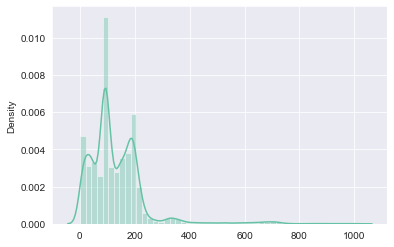

In [290]:
sns.distplot(auto_sillhouette_numerical)

**2) Distplot of the dataset (After normalization)**

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

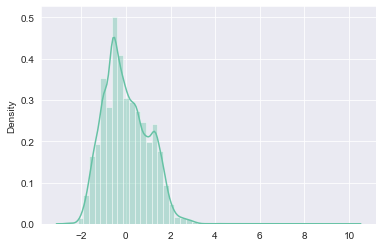

In [291]:
sns.distplot(auto_sillhouette2_normalized_numerical)

* After normalizing/scaling, the dataset is more accurate in the distribution. It is normally distributed, however, there is a bit of skewness in the dataset.

**3) Distplot for Skewness and Kurtosis**

In [292]:
auto_sillhouette2_normalized_numerical.dtypes

compactness                    float64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio        float64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity      float64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                  float64
dtype: object

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

<AxesSubplot:title={'center':'hollows_ratio'}, xlabel='hollows_ratio', ylabel='Density'>

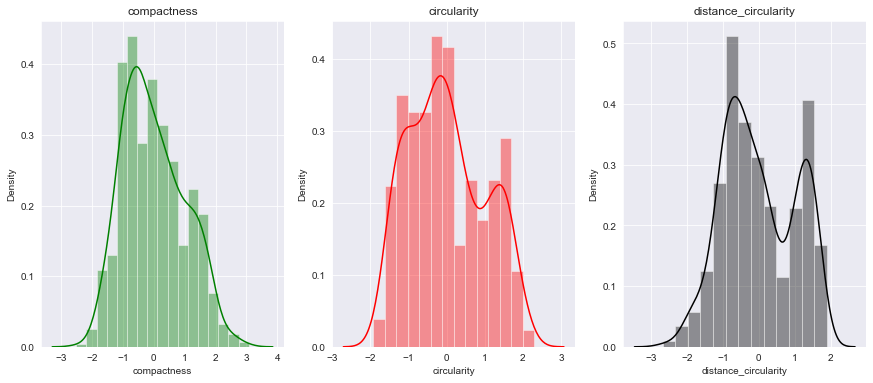

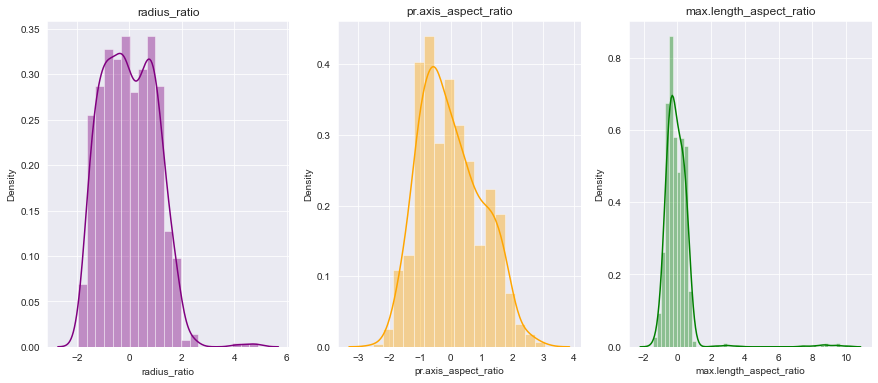

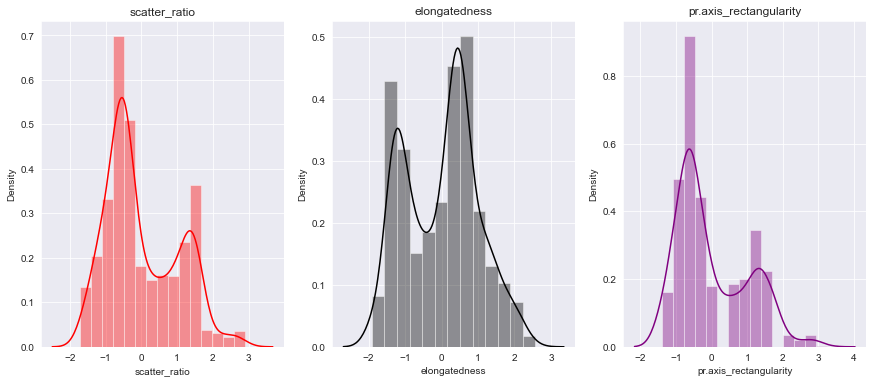

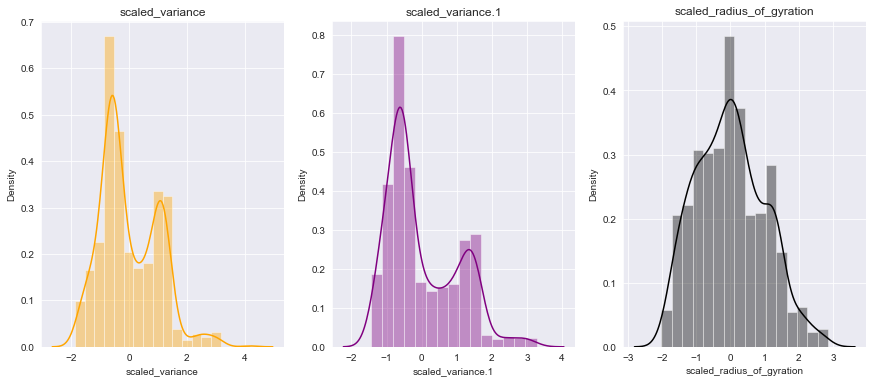

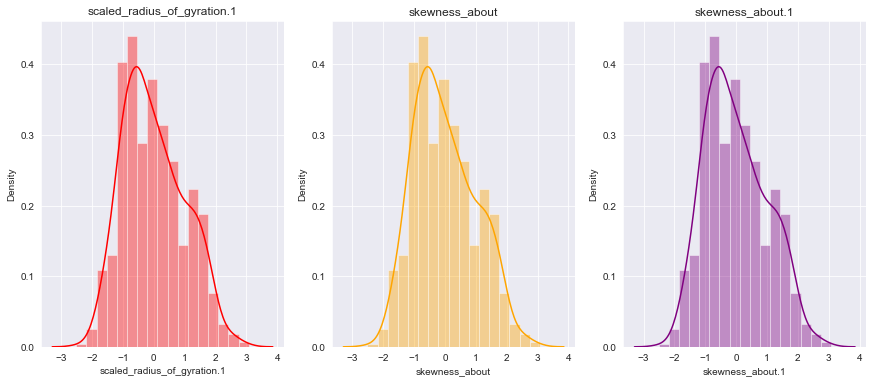

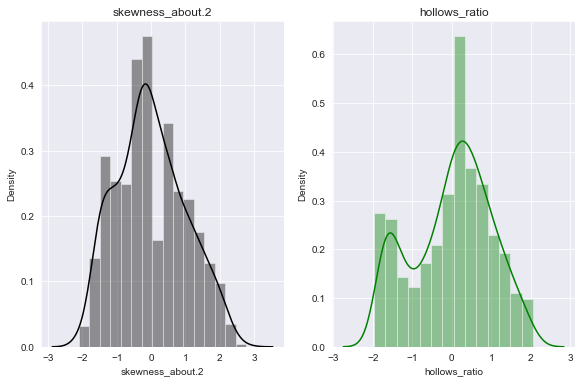

In [293]:
plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('compactness')
sns.distplot(auto_sillhouette2_normalized_numerical['compactness'],color='green')

plt.subplot(1, 4, 2)
plt.title('circularity')
sns.distplot(auto_sillhouette2_normalized_numerical['circularity'],color='red')

plt.subplot(1, 4, 3)
plt.title('distance_circularity')
sns.distplot(auto_sillhouette2_normalized_numerical['distance_circularity'],color='black')

plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('radius_ratio')
sns.distplot(auto_sillhouette2_normalized_numerical['radius_ratio'],color='purple')

plt.subplot(1, 4, 2)
plt.title('pr.axis_aspect_ratio')
sns.distplot(auto_sillhouette2_normalized_numerical['pr.axis_aspect_ratio'],color='orange')

plt.subplot(1, 4, 3)
plt.title('max.length_aspect_ratio')
sns.distplot(auto_sillhouette2_normalized_numerical['max.length_aspect_ratio'],color='green')

plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('scatter_ratio')
sns.distplot(auto_sillhouette2_normalized_numerical['scatter_ratio'],color='red')

plt.subplot(1, 4, 2)
plt.title('elongatedness')
sns.distplot(auto_sillhouette2_normalized_numerical['elongatedness'],color='black')

plt.subplot(1, 4, 3)
plt.title('pr.axis_rectangularity')
sns.distplot(auto_sillhouette2_normalized_numerical['pr.axis_rectangularity'],color='purple')

plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('scaled_variance')
sns.distplot(auto_sillhouette2_normalized_numerical['scaled_variance'],color='orange')

plt.subplot(1, 4, 2)
plt.title('scaled_variance.1')
sns.distplot(auto_sillhouette2_normalized_numerical['scaled_variance.1'],color='purple')

plt.subplot(1, 4, 3)
plt.title('scaled_radius_of_gyration')
sns.distplot(auto_sillhouette2_normalized_numerical['scaled_radius_of_gyration'],color='black')

plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('scaled_radius_of_gyration.1')
sns.distplot(auto_sillhouette2_normalized_numerical['scaled_radius_of_gyration.1'],color='red')

plt.subplot(1, 4, 2)
plt.title('skewness_about')
sns.distplot(auto_sillhouette2_normalized_numerical['skewness_about'],color='orange')

plt.subplot(1, 4, 3)
plt.title('skewness_about.1')
sns.distplot(auto_sillhouette2_normalized_numerical['skewness_about.1'],color='purple')

plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('skewness_about.2')
sns.distplot(auto_sillhouette2_normalized_numerical['skewness_about.2'],color='black')

plt.subplot(1, 4, 2)
plt.title('hollows_ratio')
sns.distplot(auto_sillhouette2_normalized_numerical['hollows_ratio'],color='Green')

* From the above Plot, we can get a visual representation of the skewness and Kurtosis in the data.

**Skewness:**

> compactness =                   0.377862 (moderate skewness - right or positive skewness)


> circularity   =                 0.257347 (moderate skewness - right or positive skewness)


> distance_circularity    =       0.111374 (low skewness - right or positive skewness)


> radius_ratio   =                0.386977 (moderate skewness - right or positive skewness)


> pr.axis_aspect_ratio    =       0.377862 (moderate skewness - right or positive skewness)


> max.length_aspect_ratio  =      6.772610 (very high skewness - right or positive skewness)

> scatter_ratio    =              0.606230 (moderate skewness - right or positive skewness)

> elongatedness   =               0.043563 (very low skewness - right or positive skewness)

> pr.axis_rectangularity   =      0.769895 (high skewness - right or positive skewness)

> max.length_rectangularity      0.257065 (moderate skewness - right or positive skewness)

> scaled_variance  =              0.653976 (moderate skewness - right or positive skewness)

> scaled_variance.1  =            0.834785 (high skewness - right or positive skewness)

> scaled_radius_of_gyration   =   0.279516 (moderate skewness - right or positive skewness)

> scaled_radius_of_gyration.1  =  0.377862 (moderate skewness - right or positive skewness)

> skewness_about    =             0.377862 (moderate skewness - right or positive skewness)
 
> skewness_about.1   =            0.377862 (moderate skewness - right or positive skewness)

> skewness_about.2   =            0.242852 (moderate skewness - right or positive skewness)

> hollows_ratio    =             -0.230816 (very low skewness - left or negative skewness)



**Kurtosis** 

> compactness    =                -0.537663 (moderately flat peak)

> circularity     =               -0.932528 (highly flat peak)

> distance_circularity    =       -0.979525 (highly flat peak)

> radius_ratio          =          0.290607 (slightly sharp peak)

> pr.axis_aspect_ratio   =        -0.537663 (flat peak)

> max.length_aspect_ratio  =      58.264212 (highly sharp peak)

> scatter_ratio  =                -0.619756 (moderately flat peak)

> elongatedness  =                -0.871692 (highly flat peak)

> pr.axis_rectangularity   =      -0.397331 (moderately flat peak)

> max.length_rectangularity   =   -0.770003 (highly flat peak)

> scaled_variance     =            0.115581 (slightly sharp peak)

> scaled_variance.1    =          -0.220950 (moderately flat peak)

> scaled_radius_of_gyration  =    -0.489187 (moderately flat peak)

> scaled_radius_of_gyration.1  =  -0.537663 (moderately flat peak)

> skewness_about     =            -0.537663 (moderately flat peak)
 
> skewness_about.1    =           -0.537663 (moderately flat peak)

> skewness_about.2    =           -0.596659 (moderately flat peak)

> hollows_ratio   =               -0.811749 (highly flat peak)

### b) Barplot of categorical attributes in the dataset

**1) Barplot for class to Frequency**

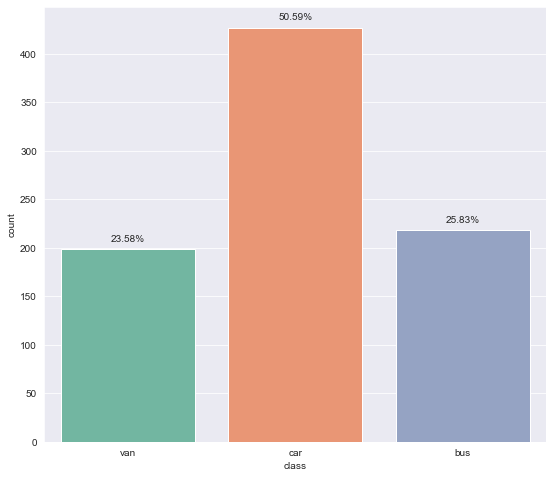

In [294]:
# Frequency of occurence of classes
fig, ax = plt.subplots(figsize=(20,8))
width = len(auto_sillhouette2['class'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = auto_sillhouette2, x= 'class') 
for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(auto_sillhouette2)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

* The observations from the plot is that, there are more number of cars > followed by bus > and lowest being van

### c) MEAN, MEDIAN AND MODE HISTOGRAM

### d) BOX PLOT

In [295]:
auto_sillhouette_numerical.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
dtype: object

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\Anaconda\lib\site

<AxesSubplot:title={'center':'hollows_ratio'}, xlabel='hollows_ratio'>

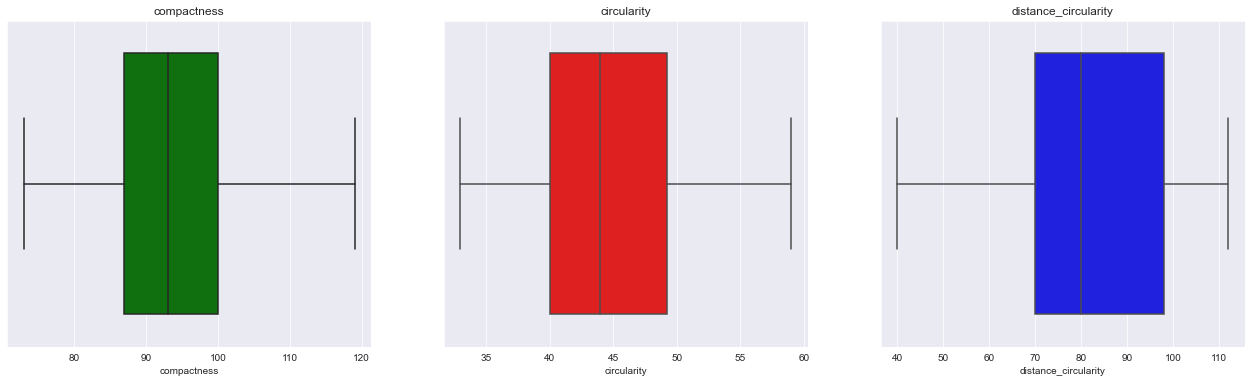

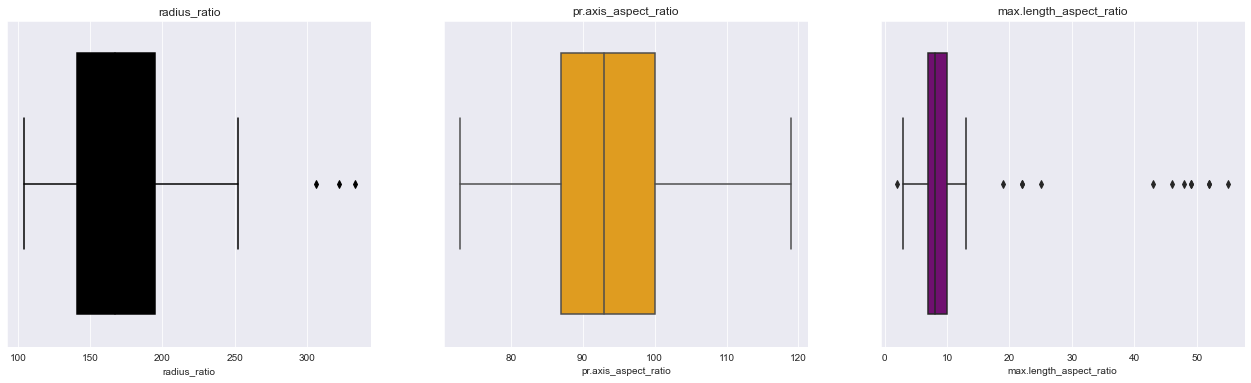

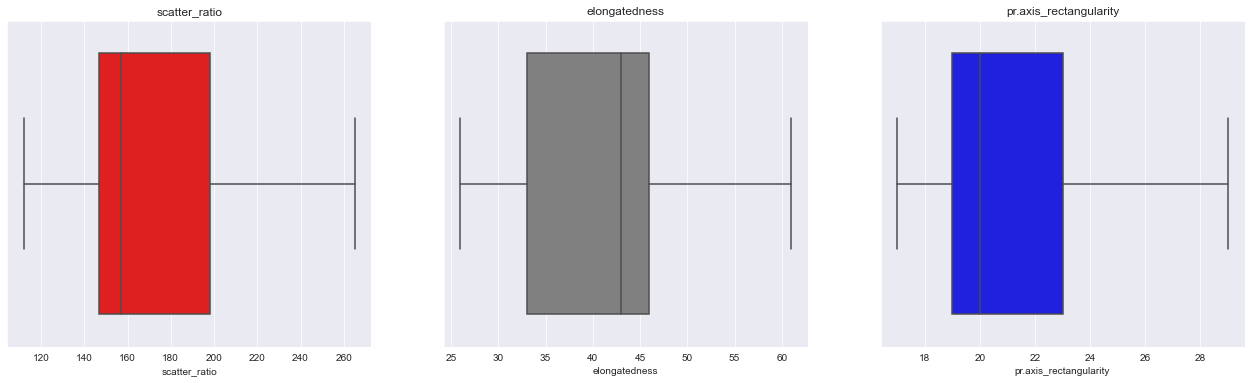

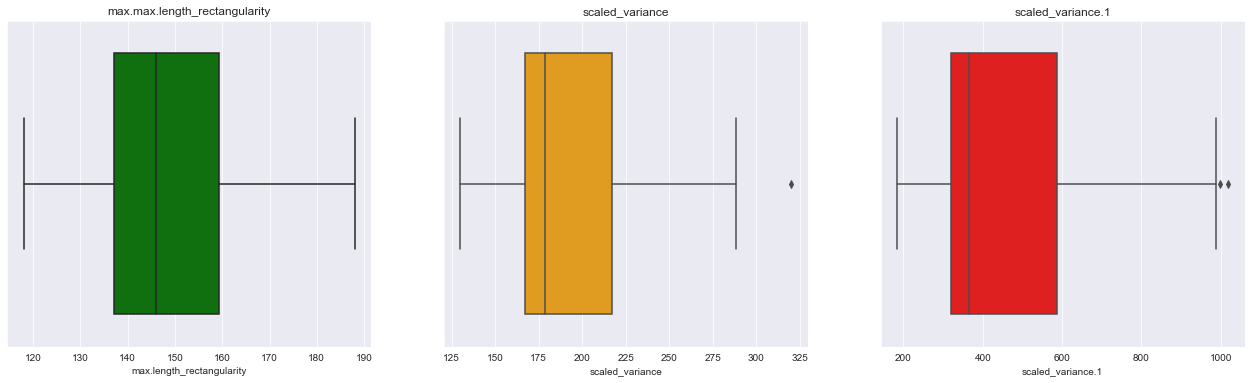

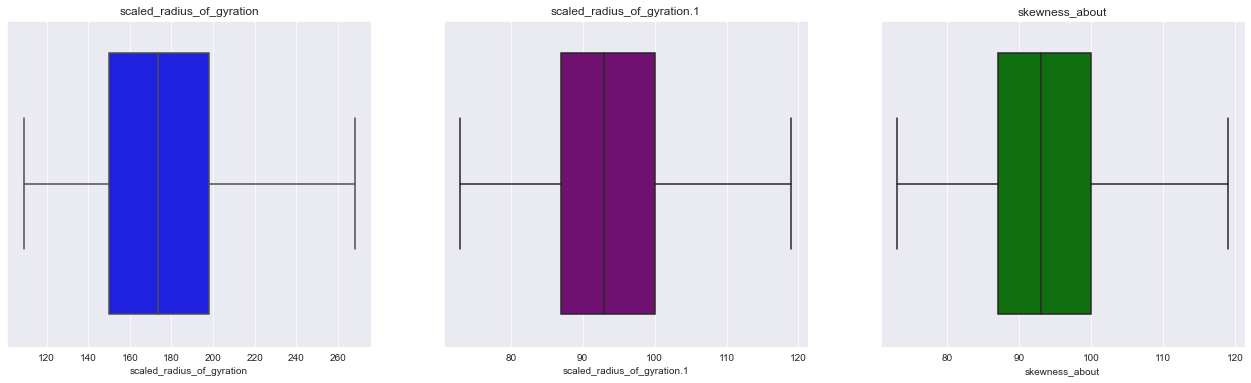

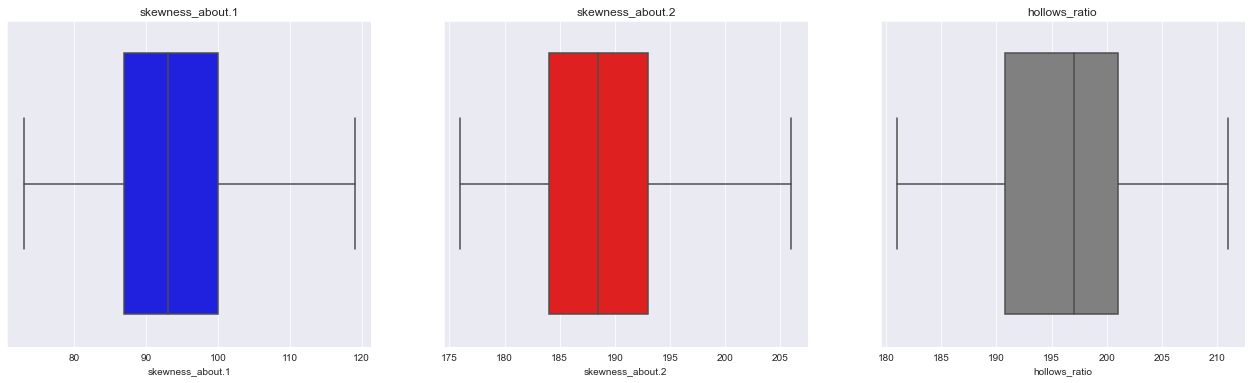

In [296]:
plt.figure(figsize=(30,6))
plt.subplot(1, 4, 1)
plt.title('compactness')
sns.boxplot(auto_sillhouette_numerical['compactness'],orient='vertical',color='green')

plt.subplot(1, 4, 2)
plt.title('circularity')
sns.boxplot(auto_sillhouette_numerical['circularity'],orient='vertical',color='red')

plt.subplot(1, 4, 3)
plt.title('distance_circularity')
sns.boxplot(auto_sillhouette_numerical['distance_circularity'],orient='vertical',color='blue')

plt.figure(figsize=(30,6))
plt.subplot(1, 4, 1)
plt.title('radius_ratio')
sns.boxplot(auto_sillhouette_numerical['radius_ratio'],orient='vertical',color='black')

plt.subplot(1, 4, 2)
plt.title('pr.axis_aspect_ratio')
sns.boxplot(auto_sillhouette_numerical['pr.axis_aspect_ratio'],orient='vertical',color='orange')

plt.subplot(1, 4, 3)
plt.title('max.length_aspect_ratio')
sns.boxplot(auto_sillhouette_numerical['max.length_aspect_ratio'],orient='vertical',color='purple')

plt.figure(figsize=(30,6))

plt.subplot(1, 4, 1)
plt.title('scatter_ratio')
sns.boxplot(auto_sillhouette_numerical['scatter_ratio'],orient='vertical',color='red')

plt.subplot(1, 4, 2)
plt.title('elongatedness')
sns.boxplot(auto_sillhouette_numerical['elongatedness'],orient='vertical',color='gray')

plt.subplot(1, 4, 3)
plt.title('pr.axis_rectangularity')
sns.boxplot(auto_sillhouette_numerical['pr.axis_rectangularity'],orient='vertical',color='blue')

plt.figure(figsize=(30,6))

plt.subplot(1, 4, 1)
plt.title('max.max.length_rectangularity')
sns.boxplot(auto_sillhouette_numerical['max.length_rectangularity'],orient='vertical',color='green')

plt.subplot(1, 4, 2)
plt.title('scaled_variance')
sns.boxplot(auto_sillhouette_numerical['scaled_variance'],orient='vertical',color='orange')

plt.subplot(1, 4, 3)
plt.title('scaled_variance.1')
sns.boxplot(auto_sillhouette_numerical['scaled_variance.1'],orient='vertical',color='red')

plt.figure(figsize=(30,6))

plt.subplot(1, 4, 1)
plt.title('scaled_radius_of_gyration')
sns.boxplot(auto_sillhouette_numerical['scaled_radius_of_gyration'],orient='vertical',color='blue')

plt.subplot(1, 4, 2)
plt.title('scaled_radius_of_gyration.1')
sns.boxplot(auto_sillhouette_numerical['scaled_radius_of_gyration.1'],orient='vertical',color='purple')

plt.subplot(1, 4, 3)
plt.title('skewness_about')
sns.boxplot(auto_sillhouette_numerical['skewness_about'],orient='vertical',color='green')

plt.figure(figsize=(30,6))

plt.subplot(1, 4, 1)
plt.title('skewness_about.1')
sns.boxplot(auto_sillhouette_numerical['skewness_about.1'],orient='vertical',color='blue')

plt.subplot(1, 4, 2)
plt.title('skewness_about.2')
sns.boxplot(auto_sillhouette_numerical['skewness_about.2'],orient='vertical',color='red')

plt.subplot(1, 4, 3)
plt.title('hollows_ratio')
sns.boxplot(auto_sillhouette_numerical['hollows_ratio'],orient='vertical',color='gray')

In [297]:
# Finding the Interquartile Range for the Dataset
Q1 = auto_sillhouette_numerical.quantile(0.25)
Q2 = auto_sillhouette_numerical.quantile(0.50)
Q3 = auto_sillhouette_numerical.quantile(0.75) 
IQR = Q3 - Q1
IQR

compactness                     13.00
circularity                      9.25
distance_circularity            28.00
radius_ratio                    54.00
pr.axis_aspect_ratio            13.00
max.length_aspect_ratio          3.00
scatter_ratio                   51.25
elongatedness                   13.00
pr.axis_rectangularity           4.00
max.length_rectangularity       22.25
scaled_variance                 50.00
scaled_variance.1              268.75
scaled_radius_of_gyration       48.25
scaled_radius_of_gyration.1     13.00
skewness_about                  13.00
skewness_about.1                13.00
skewness_about.2                 9.00
hollows_ratio                   10.25
dtype: float64

In [298]:
# Finding the Lowerfence values in the Dataset
Lowerfence_inner = Q1-(1.5 * IQR)
Lowerfence_inner

compactness                     67.500
circularity                     26.125
distance_circularity            28.000
radius_ratio                    60.000
pr.axis_aspect_ratio            67.500
max.length_aspect_ratio          2.500
scatter_ratio                   69.875
elongatedness                   13.500
pr.axis_rectangularity          13.000
max.length_rectangularity      103.625
scaled_variance                 92.000
scaled_variance.1              -84.375
scaled_radius_of_gyration       77.375
scaled_radius_of_gyration.1     67.500
skewness_about                  67.500
skewness_about.1                67.500
skewness_about.2               170.500
hollows_ratio                  175.375
dtype: float64

In [299]:
# Finding the Upperfence values in the Dataset
Upperfence_inner = Q3+(1.5 * IQR)
Upperfence_inner

compactness                    119.500
circularity                     63.125
distance_circularity           140.000
radius_ratio                   276.000
pr.axis_aspect_ratio           119.500
max.length_aspect_ratio         14.500
scatter_ratio                  274.875
elongatedness                   65.500
pr.axis_rectangularity          29.000
max.length_rectangularity      192.625
scaled_variance                292.000
scaled_variance.1              990.625
scaled_radius_of_gyration      270.375
scaled_radius_of_gyration.1    119.500
skewness_about                 119.500
skewness_about.1               119.500
skewness_about.2               206.500
hollows_ratio                  216.375
dtype: float64

**Total number of Upper fence outliers**

In [300]:
# Count of Outliers over the upper fence
countoutup =(auto_sillhouette_numerical>Upperfence_inner).sum()
countoutup

compactness                     0
circularity                     0
distance_circularity            0
radius_ratio                    3
pr.axis_aspect_ratio            0
max.length_aspect_ratio        12
scatter_ratio                   0
elongatedness                   0
pr.axis_rectangularity          0
max.length_rectangularity       0
scaled_variance                 1
scaled_variance.1               2
scaled_radius_of_gyration       0
scaled_radius_of_gyration.1     0
skewness_about                  0
skewness_about.1                0
skewness_about.2                0
hollows_ratio                   0
dtype: int64

**Total number of Lower fence outliers**

In [301]:
# Count of Outliers below the lower fence
countoutdown =(auto_sillhouette_numerical<Lowerfence_inner).sum()
countoutdown

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        1
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64

**Total number of outliers**

In [302]:
#Count of Total Outliers
Totalout = countoutup + countoutdown
Totalout

compactness                     0
circularity                     0
distance_circularity            0
radius_ratio                    3
pr.axis_aspect_ratio            0
max.length_aspect_ratio        13
scatter_ratio                   0
elongatedness                   0
pr.axis_rectangularity          0
max.length_rectangularity       0
scaled_variance                 1
scaled_variance.1               2
scaled_radius_of_gyration       0
scaled_radius_of_gyration.1     0
skewness_about                  0
skewness_about.1                0
skewness_about.2                0
hollows_ratio                   0
dtype: int64

### Removing outliers from the dataset

In [303]:
auto_sillhouette_numerical

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,95.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,95.0,95.0,95.0,187.0,197
1,91,41.0,84.0,141.0,91.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,91.0,91.0,91.0,189.0,199
2,104,50.0,106.0,209.0,104.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,104.0,104.0,104.0,188.0,196
3,93,41.0,82.0,159.0,93.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,93.0,93.0,93.0,199.0,207
4,85,44.0,70.0,205.0,85.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,85.0,85.0,85.0,180.0,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,93.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,93.0,93.0,93.0,188.0,195
842,89,46.0,84.0,163.0,89.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,89.0,89.0,89.0,186.0,197
843,106,54.0,101.0,222.0,106.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,106.0,106.0,106.0,187.0,201
844,86,36.0,78.0,146.0,86.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,86.0,86.0,86.0,190.0,195


In [304]:
# We can further remove the outliers for better clarity on the data
Doutlier9 = auto_sillhouette_numerical.copy()
def remove_outliers(Doutlier9, q=0.05):
    upper = Doutlier9.quantile(1-q)
    lower = Doutlier9.quantile(q)
    mask = (Doutlier9 < upper) & (Doutlier9 > lower)
    return mask
mask = remove_outliers(Doutlier9, 0.1)
Doutlier9 = Doutlier9[mask]

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\Anaconda\lib\site

<AxesSubplot:title={'center':'hollows_ratio'}, xlabel='hollows_ratio'>

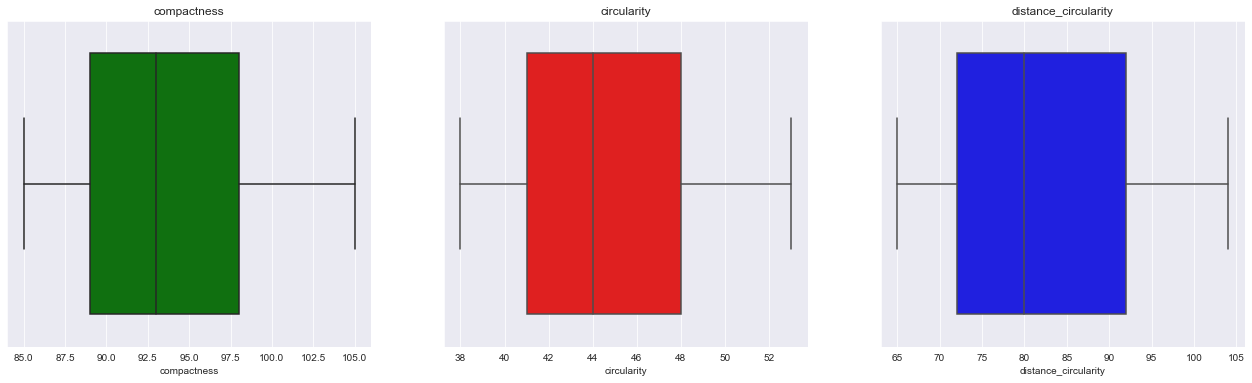

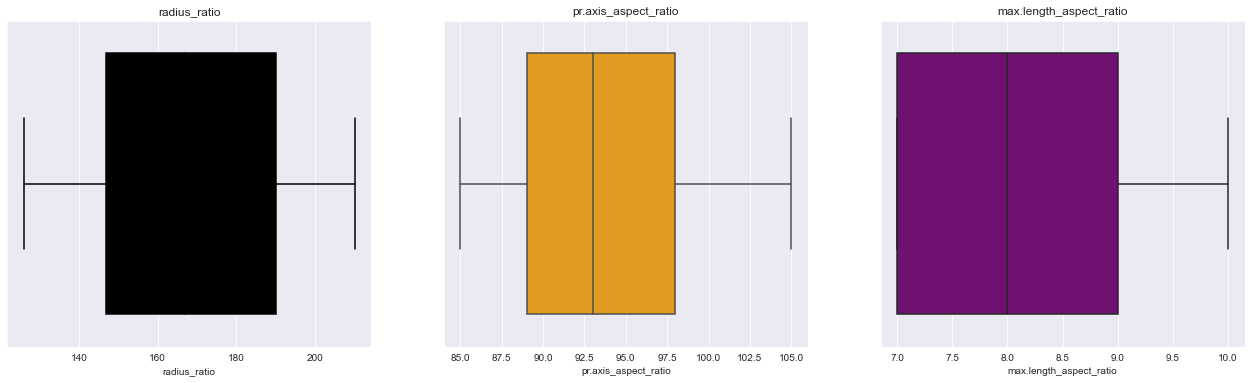

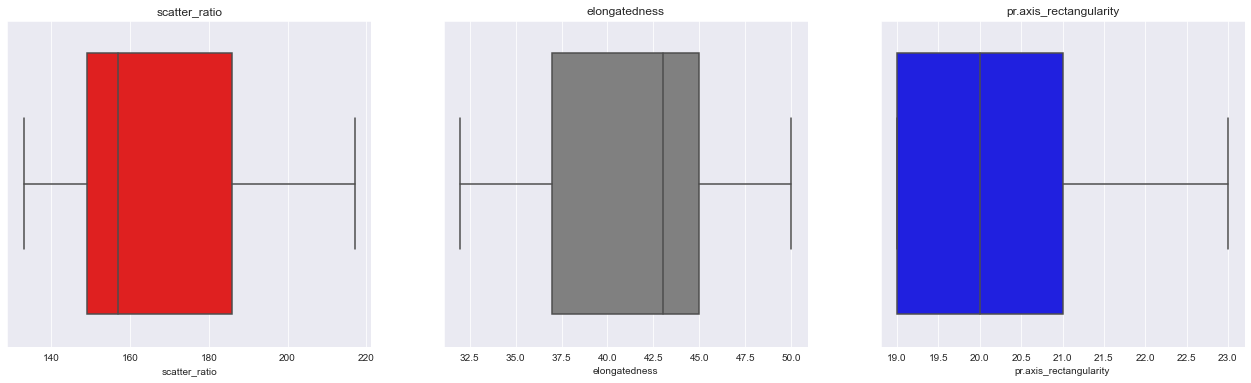

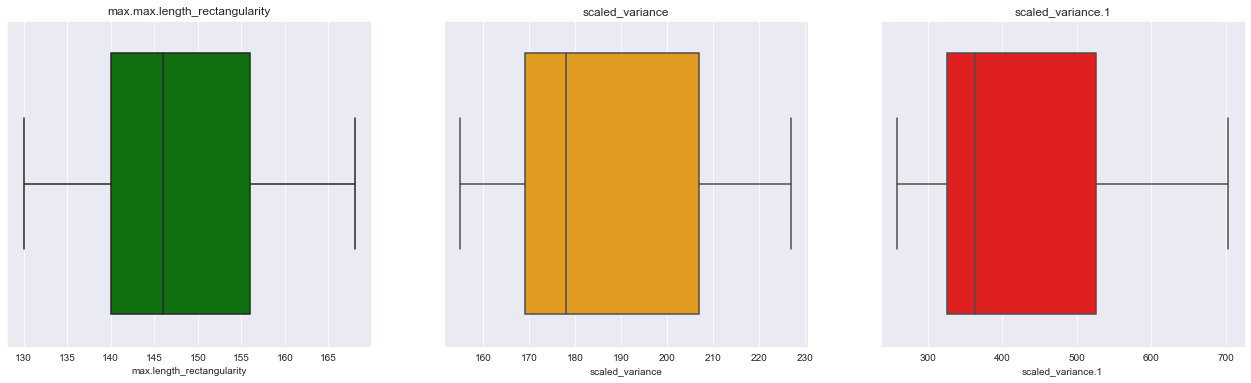

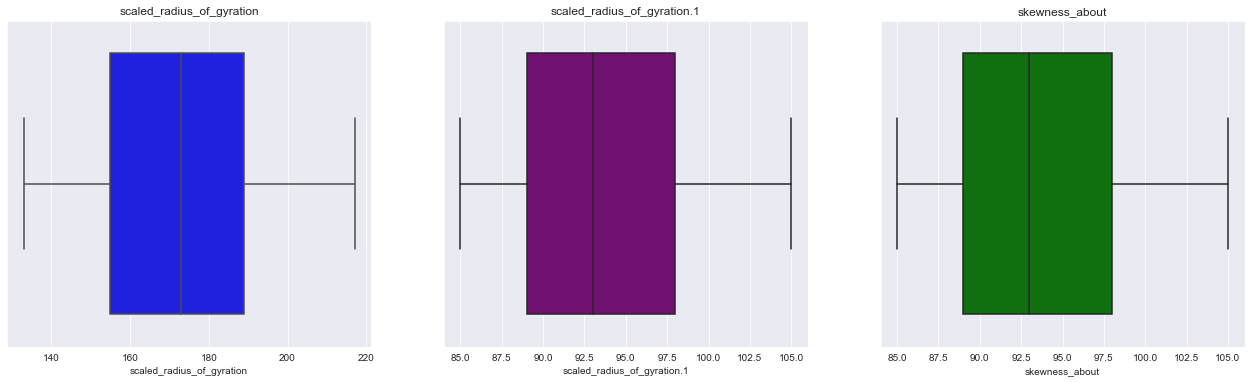

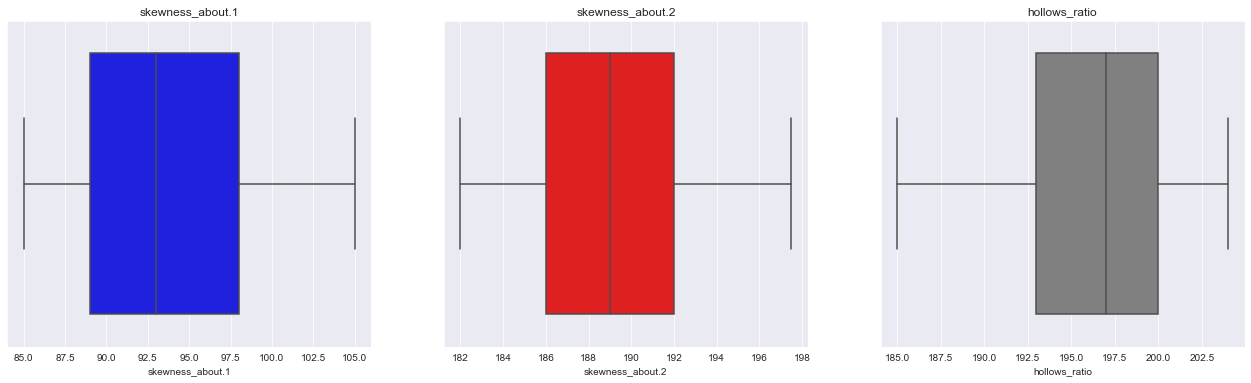

In [305]:
plt.figure(figsize=(30,6))
plt.subplot(1, 4, 1)
plt.title('compactness')
sns.boxplot(Doutlier9['compactness'],orient='vertical',color='green')

plt.subplot(1, 4, 2)
plt.title('circularity')
sns.boxplot(Doutlier9['circularity'],orient='vertical',color='red')

plt.subplot(1, 4, 3)
plt.title('distance_circularity')
sns.boxplot(Doutlier9['distance_circularity'],orient='vertical',color='blue')

plt.figure(figsize=(30,6))
plt.subplot(1, 4, 1)
plt.title('radius_ratio')
sns.boxplot(Doutlier9['radius_ratio'],orient='vertical',color='black')

plt.subplot(1, 4, 2)
plt.title('pr.axis_aspect_ratio')
sns.boxplot(Doutlier9['pr.axis_aspect_ratio'],orient='vertical',color='orange')

plt.subplot(1, 4, 3)
plt.title('max.length_aspect_ratio')
sns.boxplot(Doutlier9['max.length_aspect_ratio'],orient='vertical',color='purple')

plt.figure(figsize=(30,6))

plt.subplot(1, 4, 1)
plt.title('scatter_ratio')
sns.boxplot(Doutlier9['scatter_ratio'],orient='vertical',color='red')

plt.subplot(1, 4, 2)
plt.title('elongatedness')
sns.boxplot(Doutlier9['elongatedness'],orient='vertical',color='gray')

plt.subplot(1, 4, 3)
plt.title('pr.axis_rectangularity')
sns.boxplot(Doutlier9['pr.axis_rectangularity'],orient='vertical',color='blue')

plt.figure(figsize=(30,6))

plt.subplot(1, 4, 1)
plt.title('max.max.length_rectangularity')
sns.boxplot(Doutlier9['max.length_rectangularity'],orient='vertical',color='green')

plt.subplot(1, 4, 2)
plt.title('scaled_variance')
sns.boxplot(Doutlier9['scaled_variance'],orient='vertical',color='orange')

plt.subplot(1, 4, 3)
plt.title('scaled_variance.1')
sns.boxplot(Doutlier9['scaled_variance.1'],orient='vertical',color='red')

plt.figure(figsize=(30,6))

plt.subplot(1, 4, 1)
plt.title('scaled_radius_of_gyration')
sns.boxplot(Doutlier9['scaled_radius_of_gyration'],orient='vertical',color='blue')

plt.subplot(1, 4, 2)
plt.title('scaled_radius_of_gyration.1')
sns.boxplot(Doutlier9['scaled_radius_of_gyration.1'],orient='vertical',color='purple')

plt.subplot(1, 4, 3)
plt.title('skewness_about')
sns.boxplot(Doutlier9['skewness_about'],orient='vertical',color='green')

plt.figure(figsize=(30,6))

plt.subplot(1, 4, 1)
plt.title('skewness_about.1')
sns.boxplot(Doutlier9['skewness_about.1'],orient='vertical',color='blue')

plt.subplot(1, 4, 2)
plt.title('skewness_about.2')
sns.boxplot(Doutlier9['skewness_about.2'],orient='vertical',color='red')

plt.subplot(1, 4, 3)
plt.title('hollows_ratio')
sns.boxplot(Doutlier9['hollows_ratio'],orient='vertical',color='gray')

### e) CUMULATIVE DISTRIBUTION

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

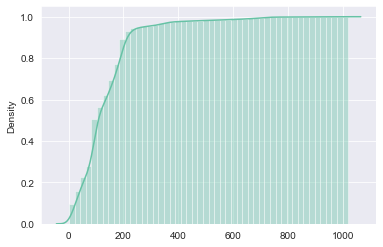

In [306]:
#Cumulative Distribution Plot
sns.distplot(auto_sillhouette_numerical, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

* The cumulative distribution function (CDF) calculates the cumulative probability for a given x-value. Use the CDF to determine the probability that a random observation that is taken from the population will be less than or equal to a certain value.


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.1.7 Bivariate Analysis
   

### a) Bivariate barplot between Categorical and continuous attributes

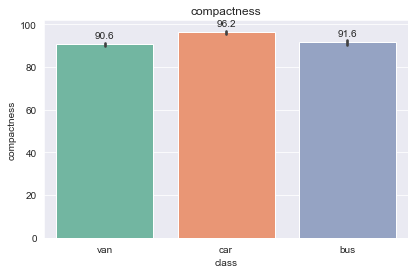

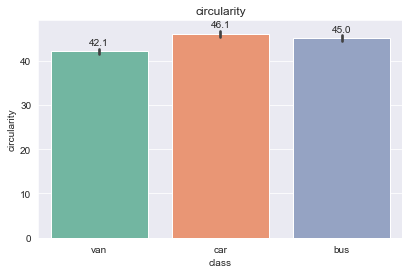

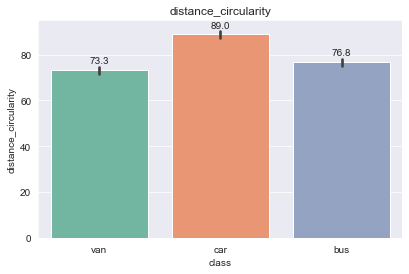

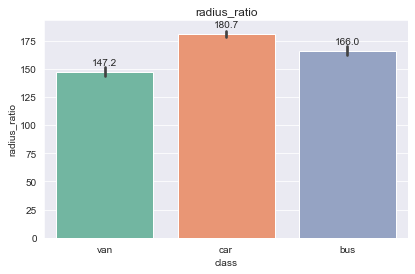

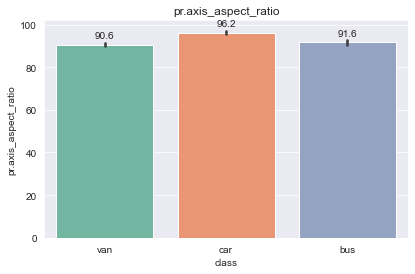

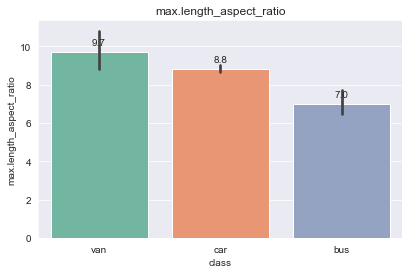

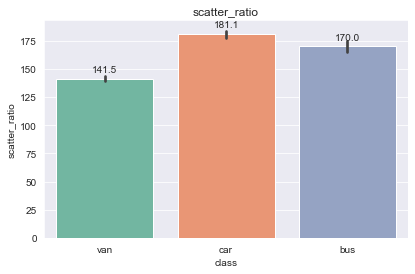

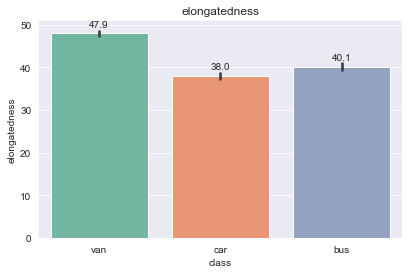

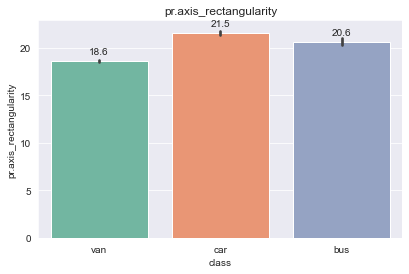

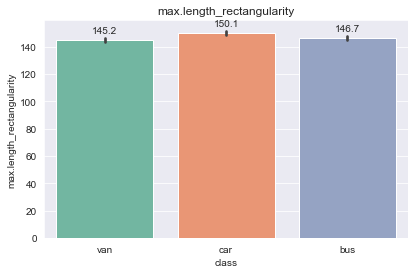

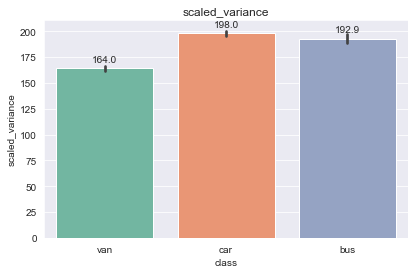

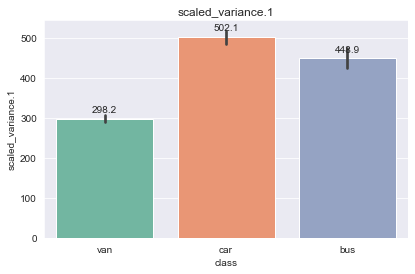

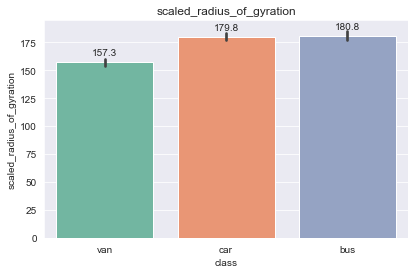

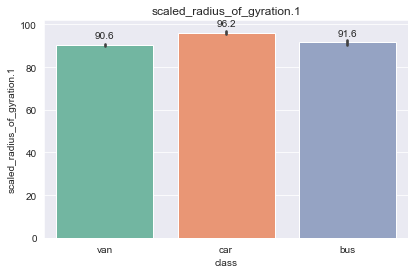

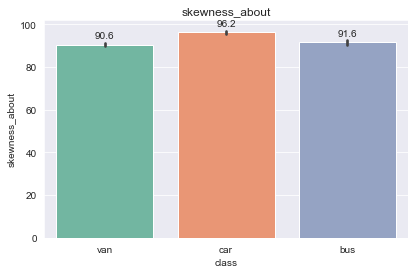

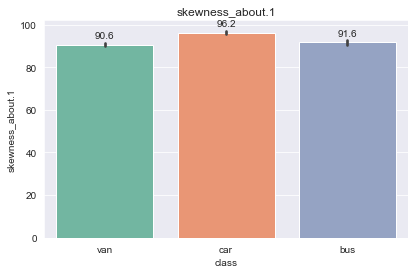

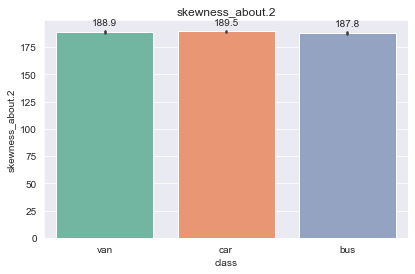

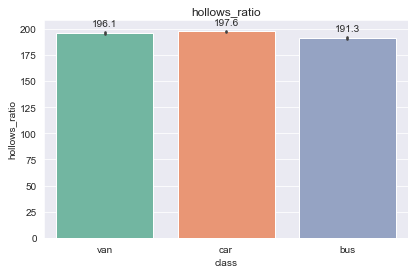

In [307]:
#BiVariate Analysis with Barplot

plt.figure(figsize=(30,4))
plt.subplot(1, 4, 1)
plt.title('compactness')
splot = sns.barplot(x=auto_sillhouette2['class'], y=auto_sillhouette2['compactness'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(30,4))
plt.subplot(1, 4, 1)
plt.title('circularity')
splot = sns.barplot(x=auto_sillhouette2['class'], y=auto_sillhouette2['circularity'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(30,4))
plt.subplot(1, 4, 1)
plt.title('distance_circularity')
splot = sns.barplot(x=auto_sillhouette2['class'], y=auto_sillhouette2['distance_circularity'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()


plt.figure(figsize=(30,4))
plt.subplot(1, 4, 1)
plt.title('radius_ratio')
splot = sns.barplot(x=auto_sillhouette2['class'], y=auto_sillhouette2['radius_ratio'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(30,4))
plt.subplot(1, 4, 1)
plt.title('pr.axis_aspect_ratio')
splot = sns.barplot(x=auto_sillhouette2['class'], y=auto_sillhouette2['pr.axis_aspect_ratio'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()


plt.figure(figsize=(30,4))
plt.subplot(1, 4, 1)
plt.title('max.length_aspect_ratio')
splot = sns.barplot(x=auto_sillhouette2['class'], y=auto_sillhouette2['max.length_aspect_ratio'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()


plt.figure(figsize=(30,4))
plt.subplot(1, 4, 1)
plt.title('scatter_ratio')
splot = sns.barplot(x=auto_sillhouette2['class'], y=auto_sillhouette2['scatter_ratio'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()


plt.figure(figsize=(30,4))
plt.subplot(1, 4, 1)
plt.title('elongatedness')
splot = sns.barplot(x=auto_sillhouette2['class'], y=auto_sillhouette2['elongatedness'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(30,4))
plt.subplot(1, 4, 1)
plt.title('pr.axis_rectangularity')
splot = sns.barplot(x=auto_sillhouette2['class'], y=auto_sillhouette2['pr.axis_rectangularity'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(30,4))
plt.subplot(1, 4, 1)
plt.title('max.length_rectangularity')
splot = sns.barplot(x=auto_sillhouette2['class'], y=auto_sillhouette2['max.length_rectangularity'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(30,4))
plt.subplot(1, 4, 1)
plt.title('scaled_variance')
splot = sns.barplot(x=auto_sillhouette2['class'], y=auto_sillhouette2['scaled_variance'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(30,4))
plt.subplot(1, 4, 1)
plt.title('scaled_variance.1')
splot = sns.barplot(x=auto_sillhouette2['class'], y=auto_sillhouette2['scaled_variance.1'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(30,4))
plt.subplot(1, 4, 1)
plt.title('scaled_radius_of_gyration')
splot = sns.barplot(x=auto_sillhouette2['class'], y=auto_sillhouette2['scaled_radius_of_gyration'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(30,4))
plt.subplot(1, 4, 1)
plt.title('scaled_radius_of_gyration.1')
splot = sns.barplot(x=auto_sillhouette2['class'], y=auto_sillhouette2['scaled_radius_of_gyration.1'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(30,4))
plt.subplot(1, 4, 1)
plt.title('skewness_about')
splot = sns.barplot(x=auto_sillhouette2['class'], y=auto_sillhouette2['skewness_about'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(30,4))
plt.subplot(1, 4, 1)
plt.title('skewness_about.1')
splot = sns.barplot(x=auto_sillhouette2['class'], y=auto_sillhouette2['skewness_about.1'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(30,4))
plt.subplot(1, 4, 1)
plt.title('skewness_about.2')
splot = sns.barplot(x=auto_sillhouette2['class'], y=auto_sillhouette2['skewness_about.2'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

plt.figure(figsize=(30,4))
plt.subplot(1, 4, 1)
plt.title('hollows_ratio')
splot = sns.barplot(x=auto_sillhouette2['class'], y=auto_sillhouette2['hollows_ratio'])
# Annotate the bars in plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

The following are the observations from the above plot which is between categorical and continuous attributes:

> compactness -     car > bus > van

> circularity -     car > bus > van

> distance_circularity -     car > bus > van

> radius_ratio -     car > bus > van

> pr.axis_aspect_ratio -     car > bus > van

> max.length_aspect_ratio -     van > car > bus 

> scatter_ratio -     car > bus > van

> elongatedness -     van > bus > car

> pr.axis_rectangularity -     car > bus > van

> max.length_rectangularity -     car > bus > van

> scaled_variance -     bus > car > van
 
> scaled_variance.1 -     car > bus > van

> scaled_radius_of_gyration -     bus > car > van

> scaled_radius_of_gyration.1 -     car > bus > van

> skewness_about -     car > bus > van

> skewness_about.1 -    car > bus > van

> skewness_about.2 -     car > van > bus

> hollows_ratio -      car > van > bus

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">2.1.8 Multivariate Analysis
   

### a) Correlation Heatmap

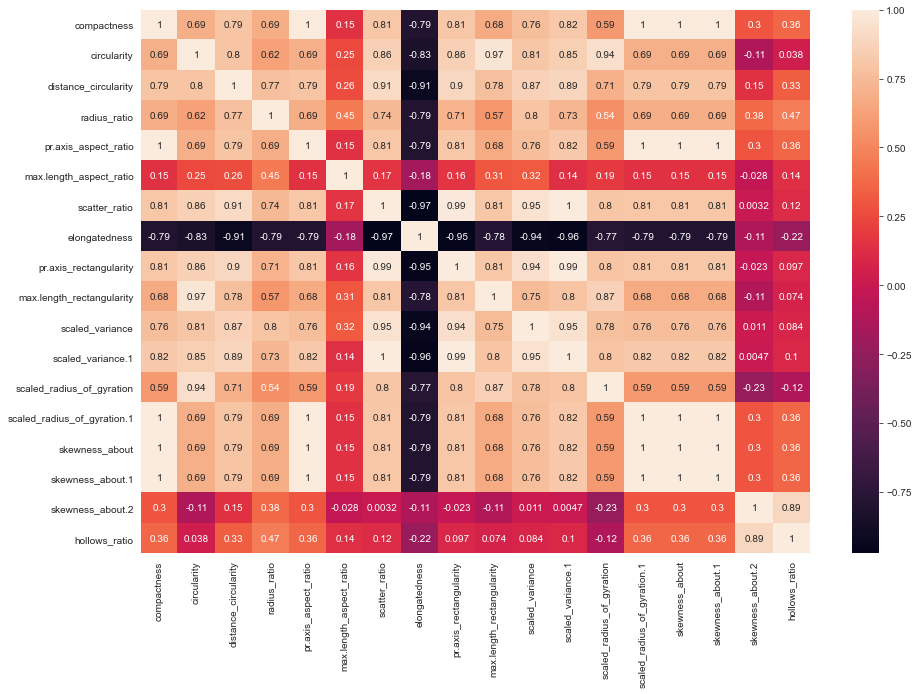

In [308]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(15,10))
sns.heatmap(auto_sillhouette_numerical.corr(),annot=True)
plt.show()

* Lots of variables are highly correlated, this means theres multicolinearity. Which can be reduced by dimensionality reduction. 

### b) Pairplot for checking the correlation

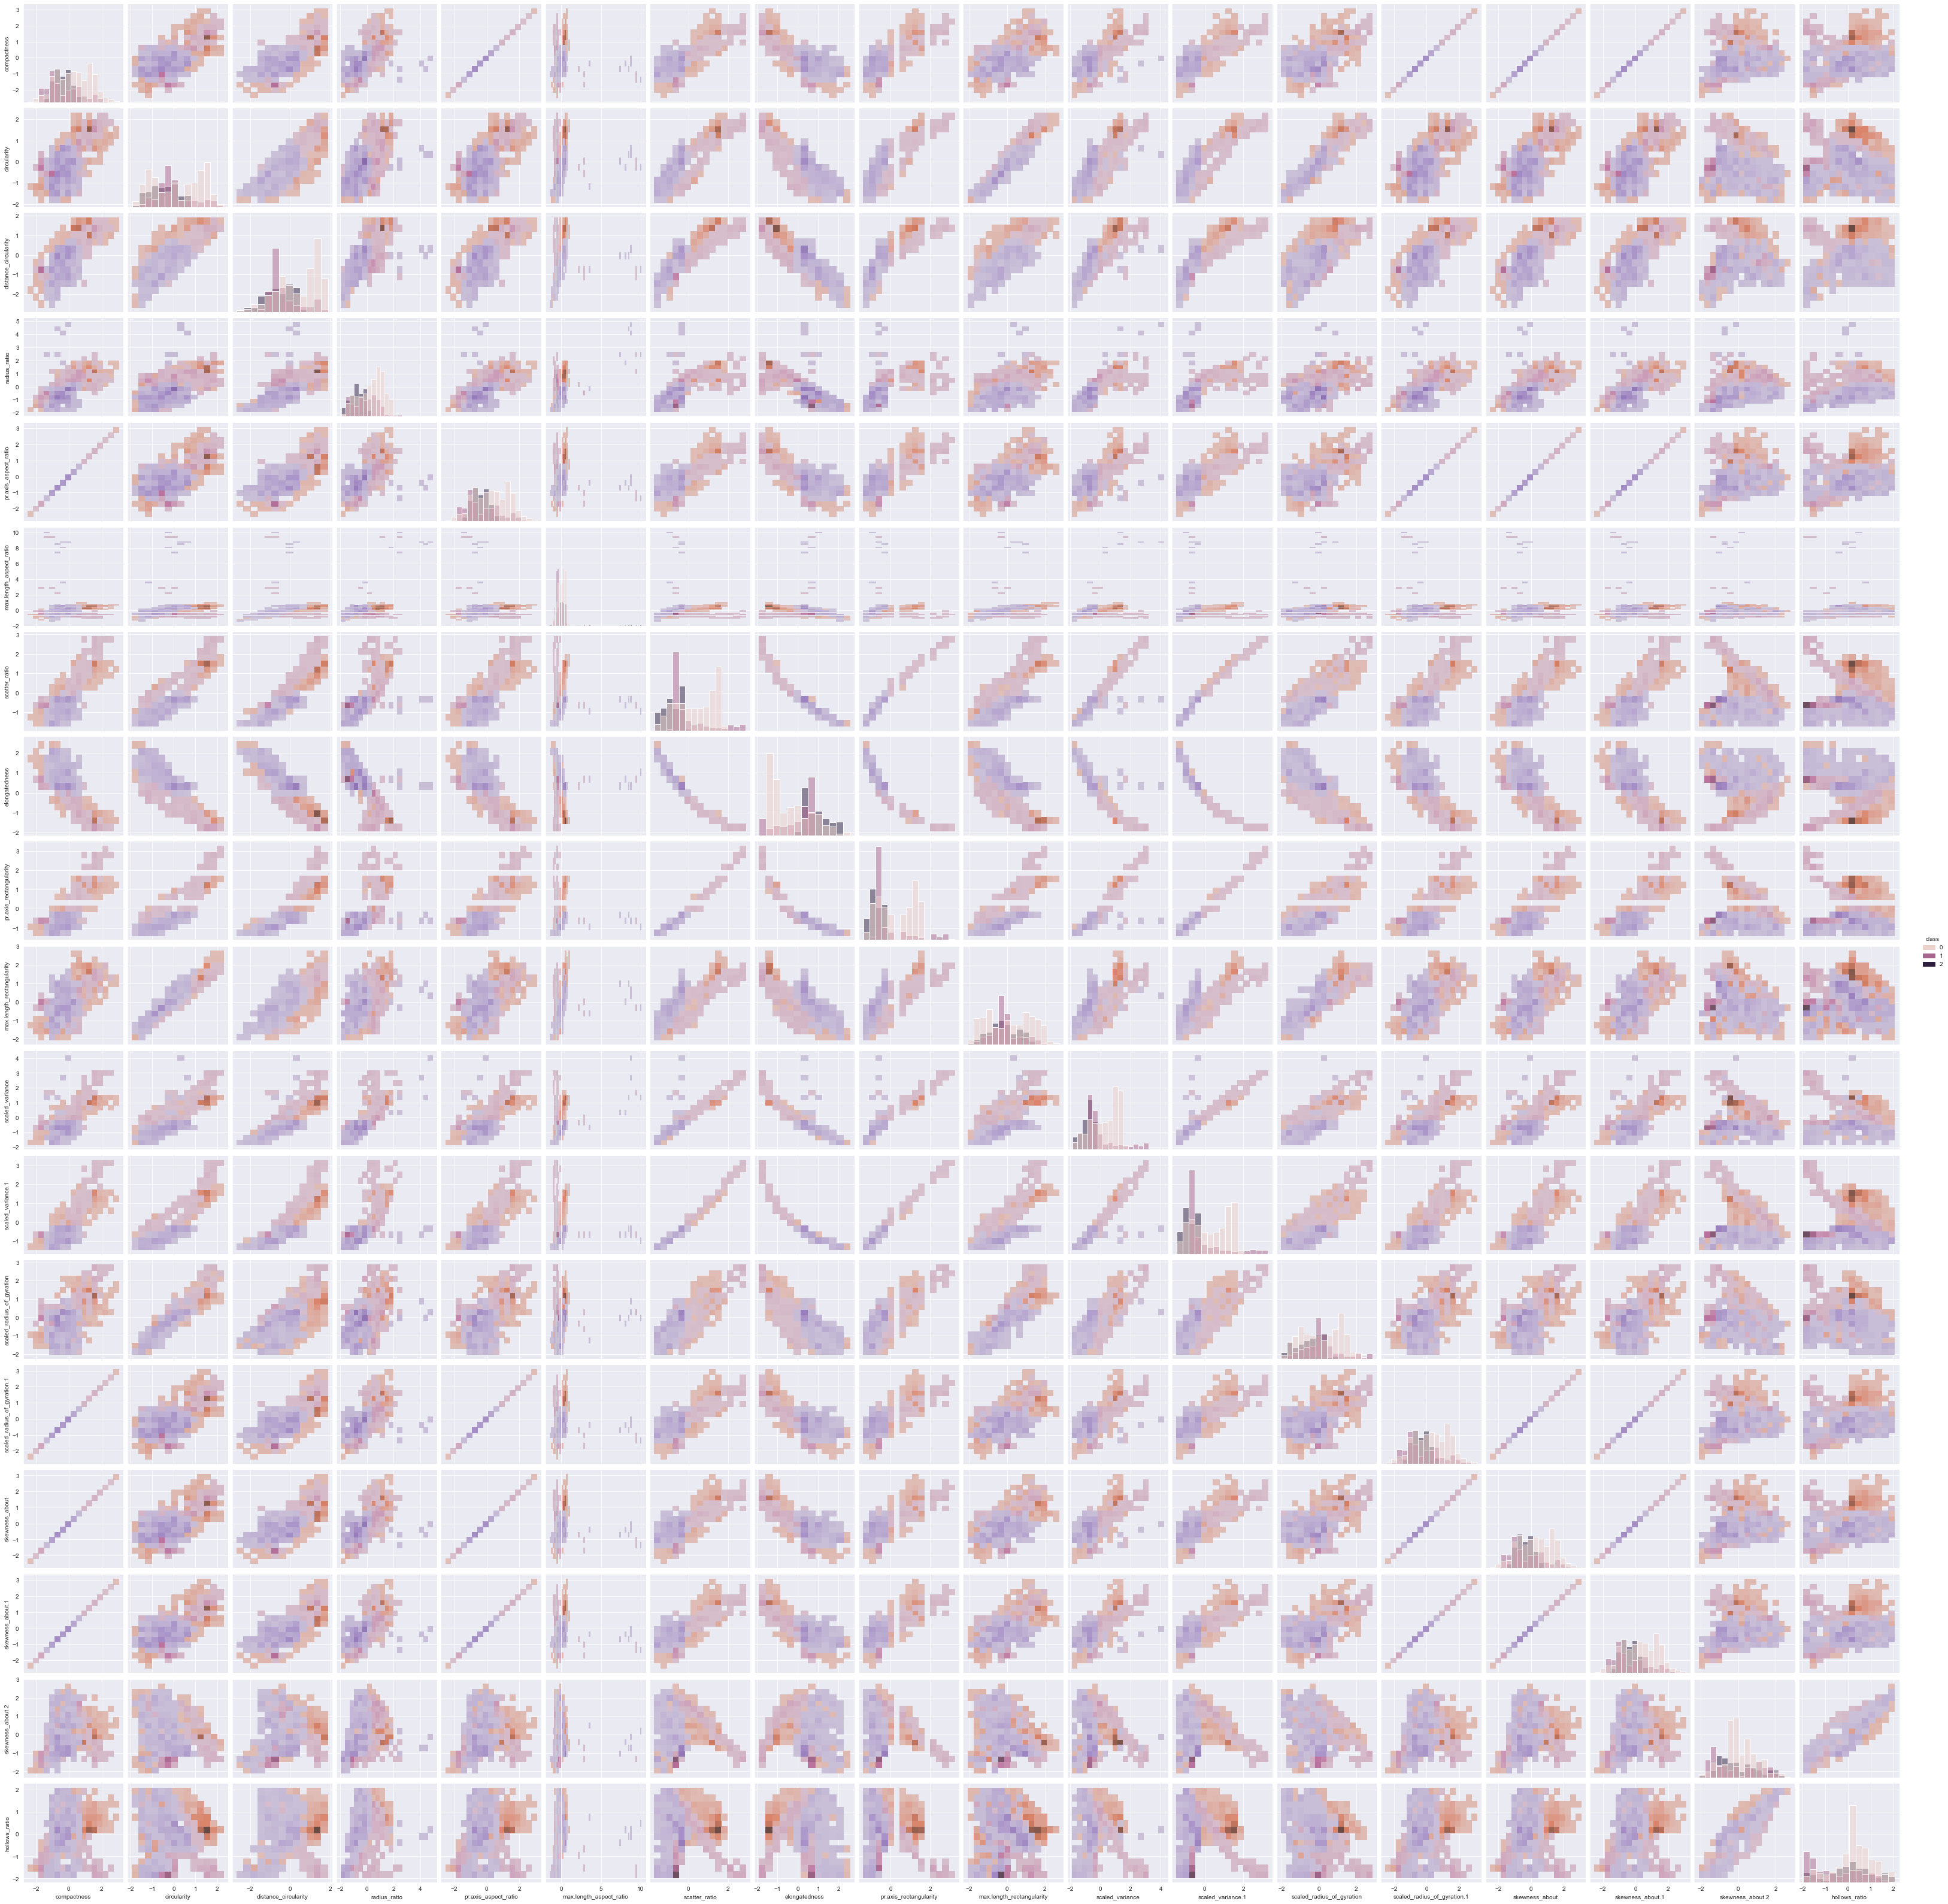

In [309]:
sns.pairplot(auto_sillhouette2_normalized, hue='class', kind="hist")  # plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()

<font size="5"><p style="color:black"> <b> 3. Classifier:</p></font>

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;"> 3.1 Design and train a best fit SVM classier using all the data attributes.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.1.1 Data segregation of Target and Predictor attributes 

In [310]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
target3 = auto_sillhouette2_normalized[["class"]]
features3 = auto_sillhouette2_normalized.drop(["class"], axis=1)

In [311]:
target3

,class
0,2
1,2
2,0
3,2
4,1
...,...
841,0
842,2
843,0
844,0


In [312]:
features3

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.158737,0.508080,0.054858,0.268289,0.158737,0.310188,-0.208043,0.139400,-0.226845,0.756015,-0.404351,-0.346973,0.283958,0.158737,0.158737,0.158737,-0.314774,0.182074
1,-0.327116,-0.630451,0.118369,-0.836496,-0.327116,0.092928,-0.599445,0.524309,-0.612847,-0.348760,-0.595620,-0.624430,-0.515627,-0.327116,-0.327116,-0.327116,0.009906,0.450965
2,1.251905,0.833374,1.515620,1.193920,1.251905,0.310188,1.146807,-1.143629,0.931162,0.686967,1.093925,1.102601,1.391075,1.251905,1.251905,1.251905,-0.152434,0.047629
3,-0.084190,-0.630451,-0.008654,-0.299033,-0.084190,0.092928,-0.749984,0.652612,-0.612847,-0.348760,-0.914402,-0.743341,-1.468978,-0.084190,-0.084190,-0.084190,1.633307,1.526525
4,-1.055895,-0.142509,-0.770791,1.074484,-1.055895,9.435119,-0.599445,0.524309,-0.612847,-0.279712,1.667733,-0.652742,0.406971,-1.055895,-1.055895,-1.055895,-1.451155,-1.700157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,-0.084190,-0.955745,0.308903,0.417585,-0.084190,-0.124333,0.002711,-0.117206,-0.226845,-0.970197,0.360726,-0.103490,-0.792407,-0.084190,-0.084190,-0.084190,-0.152434,-0.086816
842,-0.570042,0.182785,0.118369,-0.179597,-0.570042,0.527448,-0.298367,0.267703,-0.226845,0.756015,-0.499986,-0.409259,0.037931,-0.570042,-0.570042,-0.570042,-0.477115,0.182074
843,1.494832,1.483963,1.198063,1.582088,1.494832,0.744708,1.598424,-1.400235,1.703167,1.722694,1.253316,1.589568,0.776010,1.494832,1.494832,1.494832,-0.314774,0.719855
844,-0.934432,-1.443686,-0.262699,-0.687201,-0.934432,-0.341593,-1.020954,1.165824,-0.998850,-1.660682,-1.073793,-0.964174,-0.823160,-0.934432,-0.934432,-0.934432,0.172246,-0.086816


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.1.2 Perform train-test split.

In [313]:
X_trainA, X_testA, y_trainA, y_testA = train_test_split(features3,target3, train_size = 0.7, test_size = 0.3, random_state = 10)

In [314]:
# Shape of all the split dataset
print('X_trainA:', X_trainA.shape)
print('X_testA:',X_testA.shape)
print('y_trainA:',y_trainA.shape)
print('y_testA:',y_testA.shape)

X_trainA: (590, 18)
X_testA: (254, 18)
y_trainA: (590, 1)
y_testA: (254, 1)


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">3.1.3 Support Vector Classifier Model

In [315]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_trainA, y_trainA)
prediction = svc_model.predict(X_testA)
prediction1 = svc_model.predict(X_trainA)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [316]:
# check the accuracy on the training set
print(svc_model.score(X_trainA, y_trainA))
print(svc_model.score(X_testA, y_testA))

0.9271186440677966
0.9173228346456693


<font size="5"><p style="color:black"> <b> 4. Dimensional reduction:</p></font>

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;"> 4.1 Perform dimensional reduction on the data.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> 4.1.1 Principal Component Analysis - Feature extraction method for dimensionality reduction

In [317]:
sillhouette_PCA = auto_sillhouette2_normalized.drop('class',axis =1)
sillhouette_PCA

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.158737,0.508080,0.054858,0.268289,0.158737,0.310188,-0.208043,0.139400,-0.226845,0.756015,-0.404351,-0.346973,0.283958,0.158737,0.158737,0.158737,-0.314774,0.182074
1,-0.327116,-0.630451,0.118369,-0.836496,-0.327116,0.092928,-0.599445,0.524309,-0.612847,-0.348760,-0.595620,-0.624430,-0.515627,-0.327116,-0.327116,-0.327116,0.009906,0.450965
2,1.251905,0.833374,1.515620,1.193920,1.251905,0.310188,1.146807,-1.143629,0.931162,0.686967,1.093925,1.102601,1.391075,1.251905,1.251905,1.251905,-0.152434,0.047629
3,-0.084190,-0.630451,-0.008654,-0.299033,-0.084190,0.092928,-0.749984,0.652612,-0.612847,-0.348760,-0.914402,-0.743341,-1.468978,-0.084190,-0.084190,-0.084190,1.633307,1.526525
4,-1.055895,-0.142509,-0.770791,1.074484,-1.055895,9.435119,-0.599445,0.524309,-0.612847,-0.279712,1.667733,-0.652742,0.406971,-1.055895,-1.055895,-1.055895,-1.451155,-1.700157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,-0.084190,-0.955745,0.308903,0.417585,-0.084190,-0.124333,0.002711,-0.117206,-0.226845,-0.970197,0.360726,-0.103490,-0.792407,-0.084190,-0.084190,-0.084190,-0.152434,-0.086816
842,-0.570042,0.182785,0.118369,-0.179597,-0.570042,0.527448,-0.298367,0.267703,-0.226845,0.756015,-0.499986,-0.409259,0.037931,-0.570042,-0.570042,-0.570042,-0.477115,0.182074
843,1.494832,1.483963,1.198063,1.582088,1.494832,0.744708,1.598424,-1.400235,1.703167,1.722694,1.253316,1.589568,0.776010,1.494832,1.494832,1.494832,-0.314774,0.719855
844,-0.934432,-1.443686,-0.262699,-0.687201,-0.934432,-0.341593,-1.020954,1.165824,-0.998850,-1.660682,-1.073793,-0.964174,-0.823160,-0.934432,-0.934432,-0.934432,0.172246,-0.086816


In [318]:
covMatrix = np.cov(sillhouette_PCA,rowvar=False)
print(covMatrix)

[[ 1.00118624  0.69262942  0.79303778  0.6916983   1.00118624  0.1476983
   0.8137413  -0.78969352  0.81413232  0.6764615   0.76528478  0.81942049
   0.58588691  1.00118624  1.00118624  1.00118624  0.29763941  0.36507905]
 [ 0.69262942  1.00118624  0.79977134  0.62520017  0.69262942  0.24793596
   0.86009725 -0.82899482  0.85749552  0.96697658  0.80787278  0.85210444
   0.9361836   0.69262942  0.69262942  0.69262942 -0.11399134  0.0379751 ]
 [ 0.79303778  0.79977134  1.00118624  0.77334896  0.79303778  0.26343497
   0.9093356  -0.9139888   0.89749059  0.77621563  0.86645692  0.89191179
   0.70773521  0.79303778  0.79303778  0.79303778  0.14596094  0.33210892]
 [ 0.6916983   0.62520017  0.77334896  1.00118624  0.6916983   0.44949625
   0.74019653 -0.79434027  0.71305543  0.57264871  0.79896938  0.72750222
   0.54139633  0.6916983   0.6916983   0.6916983   0.37910194  0.4681278 ]
 [ 1.00118624  0.69262942  0.79303778  0.6916983   1.00118624  0.1476983
   0.8137413  -0.78969352  0.8141323

In [319]:
pca = PCA(n_components=18)
pca.fit(sillhouette_PCA)

PCA(n_components=18)

In [320]:
print(pca.explained_variance_)

[1.24893439e+01 2.50580609e+00 1.21004832e+00 7.21951727e-01
 5.36313318e-01 2.21606912e-01 1.12494952e-01 9.13238175e-02
 5.25465857e-02 3.66140026e-02 2.25032042e-02 1.40951053e-02
 6.23570265e-03 4.68650255e-04 1.42882665e-31 4.27405984e-36
 6.07071203e-39 1.90199065e-59]


In [321]:
print(pca.components_)

[[ 2.60881157e-01  2.46960120e-01  2.61323595e-01  2.27330970e-01
   2.60881157e-01  7.03966862e-02  2.71601301e-01 -2.67272216e-01
   2.69745296e-01  2.37589932e-01  2.61842218e-01  2.70541731e-01
   2.23082541e-01  2.60881157e-01  2.60881157e-01  2.60881157e-01
   4.37885045e-02  7.70719764e-02]
 [ 1.52813516e-01 -2.10527677e-01  1.33462019e-03  1.45245638e-01
   1.52813516e-01 -1.64880543e-02 -1.10861974e-01  5.44158228e-02
  -1.21484893e-01 -1.91229533e-01 -1.12125925e-01 -1.10070990e-01
  -2.92689220e-01  1.52813516e-01  1.52813516e-01  1.52813516e-01
   5.84286845e-01  5.47013342e-01]
 [-1.83342974e-01  7.93884327e-02  1.00898509e-01  3.54057512e-01
  -1.83342974e-01  7.78666235e-01 -2.99401743e-02 -3.25939865e-02
  -4.92057400e-02  1.14659182e-01  1.12443234e-01 -5.86251503e-02
   4.83222064e-02 -1.83342974e-01 -1.83342974e-01 -1.83342974e-01
   6.64150801e-02  2.08357404e-01]
 [ 2.67145212e-01 -8.40515591e-02 -1.81054526e-01 -1.55503379e-01
   2.67145212e-01  5.14503569e-01 -1.

In [322]:
print(pca.explained_variance_ratio_)

[6.93030340e-01 1.39046507e-01 6.71452562e-02 4.00609075e-02
 2.97598820e-02 1.22969080e-02 6.24231466e-03 5.06753411e-03
 2.91579593e-03 2.03170117e-03 1.24869676e-03 7.82133606e-04
 3.46017465e-04 2.60052768e-05 7.92852069e-33 2.37166433e-37
 3.36862180e-40 1.05540950e-60]


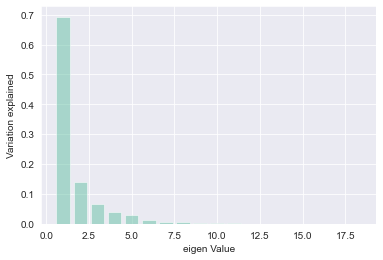

In [323]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

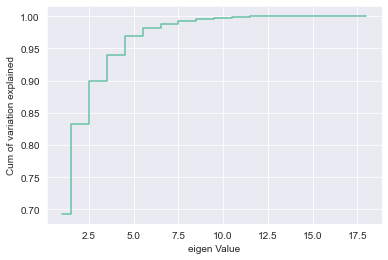

In [324]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [325]:
pca8 = PCA(n_components=8)
pca8.fit(sillhouette_PCA)
print('components:',pca8.components_)
print('\nVariance ratio:',pca8.explained_variance_ratio_)
Xpca8 = pca8.transform(sillhouette_PCA)

components: [[ 0.26088116  0.24696012  0.2613236   0.22733097  0.26088116  0.07039669
   0.2716013  -0.26727222  0.2697453   0.23758993  0.26184222  0.27054173
   0.22308254  0.26088116  0.26088116  0.26088116  0.0437885   0.07707198]
 [ 0.15281352 -0.21052768  0.00133462  0.14524564  0.15281352 -0.01648805
  -0.11086197  0.05441582 -0.12148489 -0.19122953 -0.11212593 -0.11007099
  -0.29268922  0.15281352  0.15281352  0.15281352  0.58428684  0.54701334]
 [-0.18334297  0.07938843  0.10089851  0.35405751 -0.18334297  0.77866623
  -0.02994017 -0.03259399 -0.04920574  0.11465918  0.11244323 -0.05862515
   0.04832221 -0.18334297 -0.18334297 -0.18334297  0.06641508  0.2083574 ]
 [ 0.26714521 -0.08405156 -0.18105453 -0.15550338  0.26714521  0.51450357
  -0.17087288  0.27145732 -0.13465115  0.00508285 -0.09678889 -0.15660209
  -0.12360087  0.26714521  0.26714521  0.26714521 -0.28314131 -0.25307051]
 [-0.00803898 -0.43568539  0.05191673  0.25321905 -0.00803898  0.07357617
   0.1758753  -0.18032

In [326]:
Xpca8

array([[ 0.31821207, -0.12201998,  0.34203547, ...,  0.02338483,
        -0.51350519,  0.29689419],
       [-1.69092282,  0.53495448,  0.06831927, ..., -0.72324697,
        -0.0932283 , -0.41796857],
       [ 4.45170497, -0.1966331 , -0.10303462, ...,  0.17113468,
        -0.5833382 , -0.51624107],
       ...,
       [ 5.69163243, -0.07366217,  0.33420443, ..., -0.33469291,
        -0.15654998,  0.75961814],
       [-3.80200581,  0.63158566, -0.05314218, ..., -0.17842325,
        -0.41511064, -0.69275043],
       [-5.12415973,  0.02686795, -0.80406751, ..., -0.21108324,
        -0.36943426, -0.09857833]])

In [327]:
Xpca8.shape

(844, 8)

<font size="5"><p style="color:black"> <b> 5. Classifier: </p></font>

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;"> 5.1 Design and train a best fit SVM classier using dimensionally reduced attributes.

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.1.1 Data segregation of Target and Predictor attributes (After PCA)

In [328]:
features4 = Xpca8

In [329]:
target4 = auto_sillhouette2_normalized[['class']]

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.1.2 Perform train-test split (After PCA)

In [330]:
X_trainB,X_testB,y_trainB,y_testB = train_test_split(features4,target4, train_size = 0.7, test_size = 0.3, random_state = 10)

In [331]:
X_trainB.shape

(590, 8)

In [332]:
X_testB.shape

(254, 8)

In [333]:
y_trainB.shape

(590, 1)

In [334]:
y_testB.shape

(254, 1)

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;">5.1.3 Support Vector Classifier Model (After PCA)

In [335]:
svc_model1 = SVC()
svc_model1.fit(X_trainB, y_trainB)
predictionX = svc_model1.predict(X_testB)
predictionX1 = svc_model1.predict(X_trainB)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [336]:
print(svc_model1.score(X_trainB, y_trainB))
print(svc_model1.score(X_testB, y_testB))

0.9271186440677966
0.9173228346456693


<font size="5"><p style="color:black"> <b> 6. Conclusion: </p></font>

<span style="font-family: Arial; font-weight:bold;font-size:1.6em;color:#0000FF;"> 6.1 Showcase key pointer on how dimensional reduction helped in this case.

* The key pointer on how the dimensional reduction with PCA has helped in this case is as follows:

> 1) There is no change in accuracy even though there are 8 less dimensions or columns. Same train and test accuracy before and after PCA. The Test accuracy is 91.73% and Train accuracy is 92.71%. 

> 2) It is computationally less intensive after dimensionality reduction.

> 3) It prevents multicolinearity and removes attributes that affect the performance of the model.

> 4) The space required to store the dataset also gets reduced.  

* The only drawback of PCA is that, we cannot interpret the model as the data is jumbled and only values which perform well computationally is considered. 